## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.
ff

## Importing necessary libraries

In [6]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user        

In [7]:
# insuring that we have the right sklearn version
import sklearn
print(sklearn.__version__)


1.5.2


In [8]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used. Don't have to use pip already am using conda in the terminal 
# Already downloaded it because in an environment with Conda don't have to download it again. 
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
#!pip install --upgrade -q threadpoolctl


In [9]:
import sys
print(sys.executable)

/usr/local/Caskroom/miniforge/base/bin/python


In [325]:
# Libraries to help with reading and manipulating data and help with data visualization
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.metrics import make_scorer, accuracy_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# to import xgboost
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# To impute missing values
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")            

## Loading the dataset

In [12]:
# Directory to read the .csv 
promotion = pd.read_csv('employee_promotion.csv')    


## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [16]:
# Checking the number of rows and columns in the training data
promotion.shape ##  Complete the code to view dimensions of the train data        

(54808, 13)

In [17]:
# let's create a copy of the data
data = promotion.copy()       

### Displaying the first few rows of the dataset

In [19]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data     

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [20]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data       

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


### Checking the data types of the columns for the dataset

In [22]:
# let's check the data types of the columns in the dataset
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Checking for duplicate values

In [24]:
# let's check for duplicate values in the data
data.duplicated() ##  Complete the code to check duplicate entries in the data      

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool

### Checking for missing values

In [26]:
# let's check for missing values in the data
data.isnull() ##  Complete the code to check missing entries in the train data    

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,True,False


### Statistical summary of the dataset

In [28]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data. Statistical metrics are organized in rows and columns are of original Df are organized in columns.  

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000,54808.000,54808.000,50684.000,54808.000,54808.000,52248.000,54808.000
mean,39195.831,1.253,34.804,3.329,5.866,0.023,63.712,0.085
std,22586.581,0.609,7.660,1.260,4.265,0.150,13.522,0.279
min,1.000,1.000,20.000,1.000,1.000,0.000,39.000,0.000
25%,19669.750,1.000,29.000,3.000,3.000,0.000,51.000,0.000
50%,39225.500,1.000,33.000,3.000,5.000,0.000,60.000,0.000
75%,58730.500,1.000,39.000,4.000,7.000,0.000,77.000,0.000
max,78298.000,10.000,60.000,5.000,37.000,1.000,99.000,1.000


In [29]:
# let's view the statistical summary of the numerical columns in the data, columns and rows are swapped. Original dataframe become rows, and statistical metrics become columns.
data.describe().T       

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


**Let's check the number of unique values in each column**

In [31]:
data.nunique() # Checking to see the unique values in each column        

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [32]:
# prints the unique values and their respective counts for each column
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)       

Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
**************************************************
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34

In [33]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling. Column will be removed permanently from data
data.drop(columns="employee_id", inplace=True)     

In [34]:
data["is_promoted"].value_counts(1)  # Checking the distribution of the target varaible.    

is_promoted
0   0.915
1   0.085
Name: proportion, dtype: float64

# Data Overview
We have 12 data variables, 8 numerical: ints or floats. The other are objects or categorical. Have printed the statistical summary and unique values. 

We permanently remove the employee_id from the data frame because it does not provide meaningful information for the predictive modeling process. It can introduce noise, irrelevant to noise. By removing it, we simplify the dataset, improve model performance, and avoid unintended bias.

Next, we are checking our distribution for our target variable employee prediction, which we are trying to predict for our project. is_promoted shows a significant class imbalance, which means we will have to use resampling or weights models necessary to ensure fair and accurate predictions for the minority class. 


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [38]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram    

In [39]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot    

In [40]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [41]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()   

### Univariate analysis

#### Observations on No. of Trainings

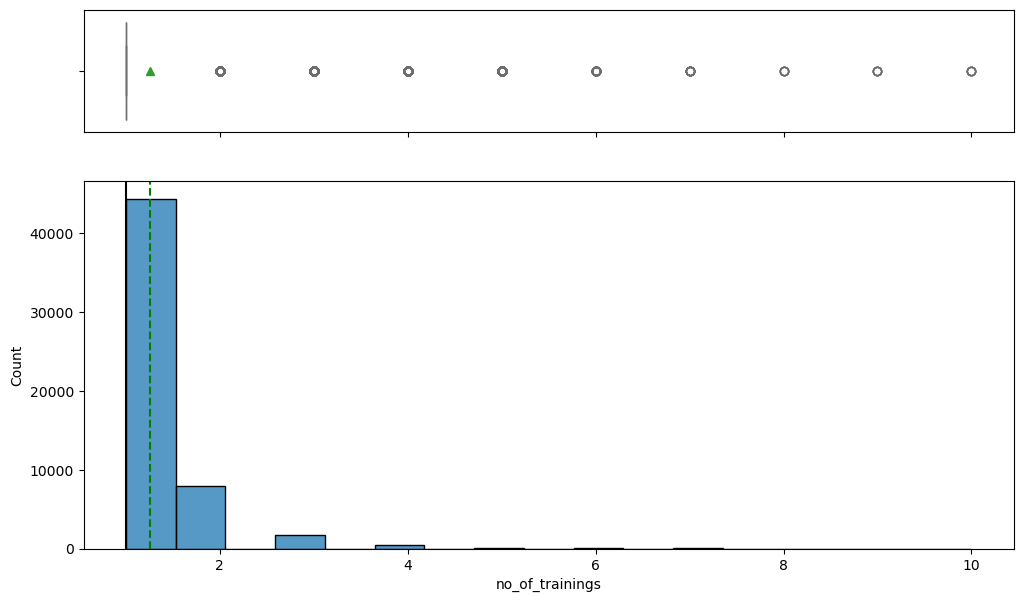

In [44]:
histogram_boxplot(data, "no_of_trainings")  

**Let's see the distribution of age of employee**

#### Observations on Age

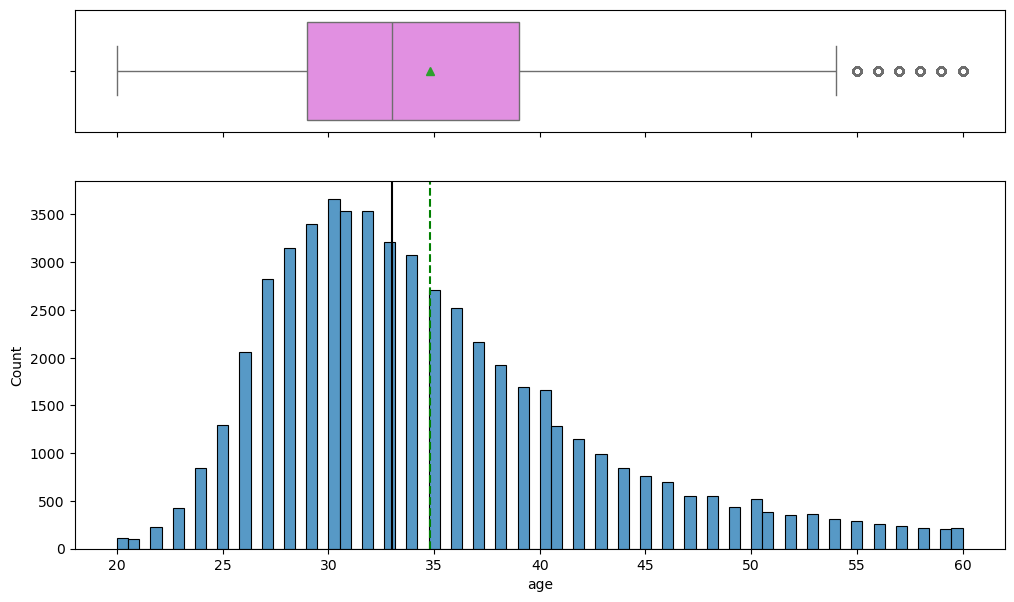

In [47]:
histogram_boxplot(data, "age")  ## Complete the code to create histogram_boxplot for 'age'  

#### Observations on Length of Service

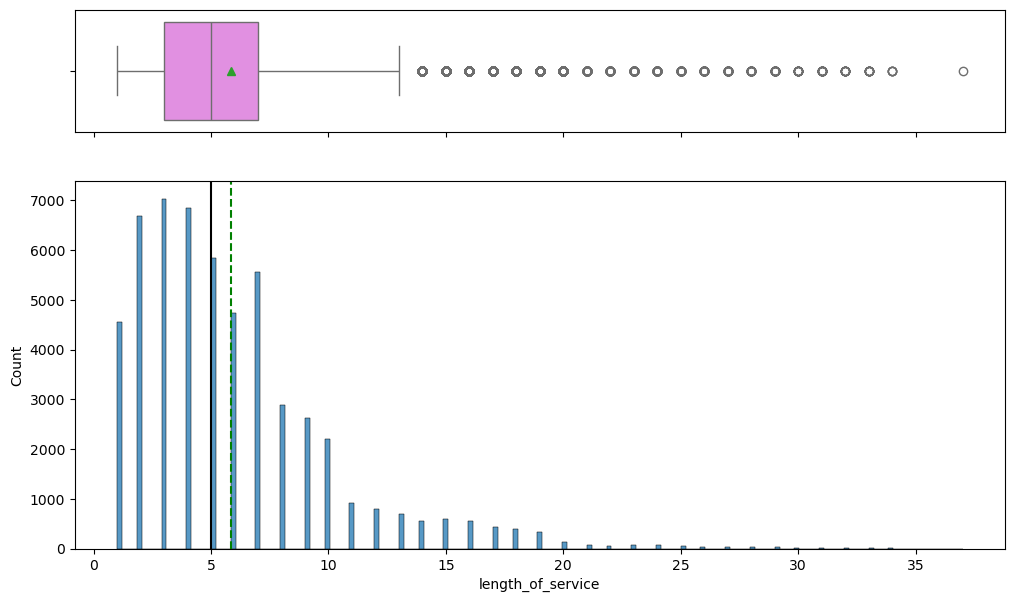

In [49]:
histogram_boxplot(data, "length_of_service")  ## Complete the code to create histogram_boxplot for 'length_of_service'  

**Let's see the distribution of average training score of employee**

#### Observations on Average Training Score

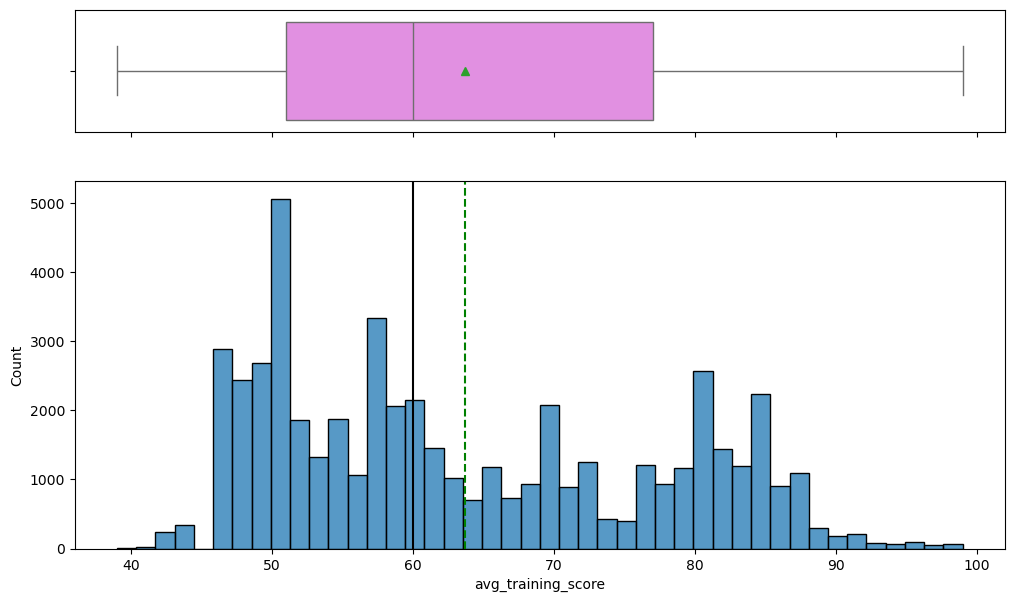

In [52]:
histogram_boxplot(data, "avg_training_score")  ## Complete the code to create histogram_boxplot for 'avg_training_score'  

#### Observations on Department

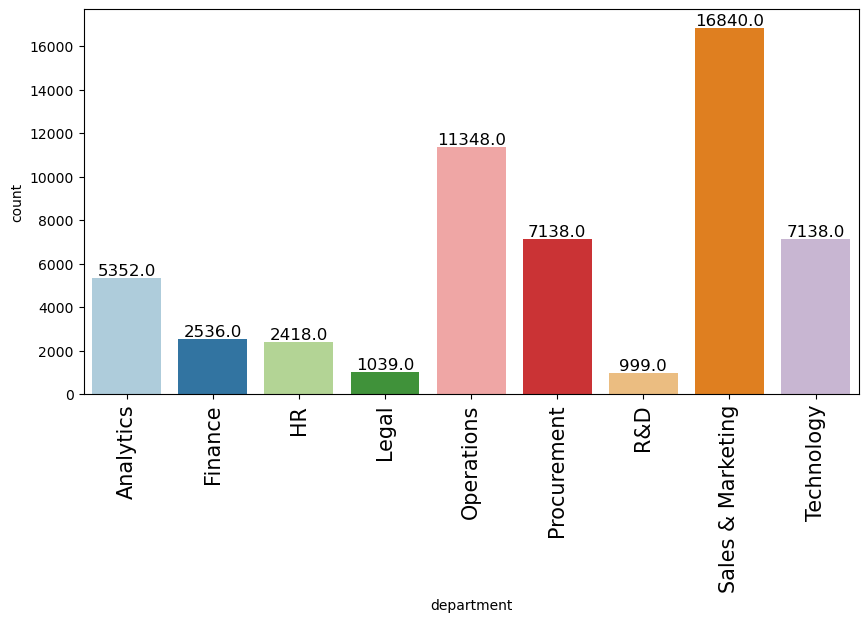

In [54]:
labeled_barplot(data, "department")   

#### Observations on Education

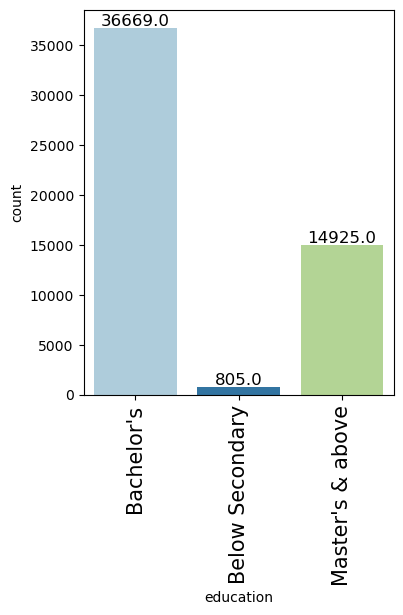

In [56]:
labeled_barplot(data, "education") ## Complete the code to create labeled_barplot for 'education'   

#### Observations on Gender

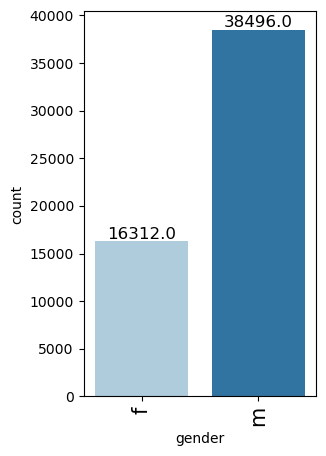

In [58]:
labeled_barplot(data, 'gender') ## Complete the code to create labeled_barplot for 'gender'   

#### Observations on Recruitment Channel

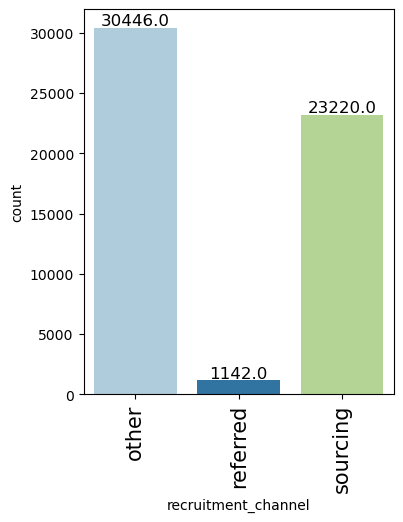

In [60]:
# method or source used to attract and find potential candidates for job openings. Pathway through which applicants become aware of and apply for positions. 
labeled_barplot(data, 'recruitment_channel') ## Complete the code to create labeled_barplot for 'recruitment_channel'  

#### Observations on Previous Year Rating

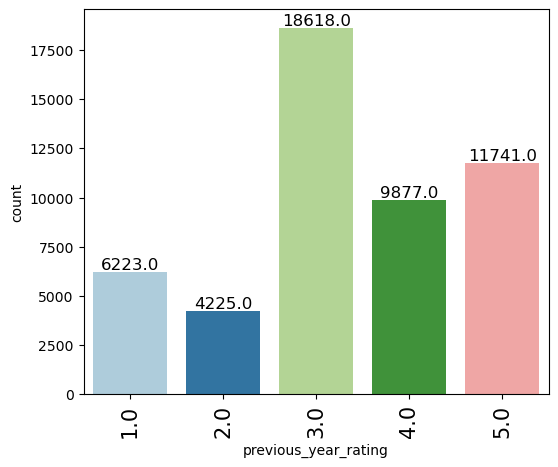

In [62]:
labeled_barplot(data, 'previous_year_rating') ## Complete the code to create labeled_barplot for 'previous_year_rating'  

#### Observations on Awards Won

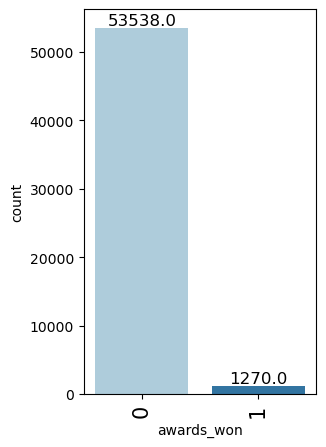

In [64]:
labeled_barplot(data, 'awards_won') ## Complete the code to create labeled_barplot for 'awards_won'  

#### Observations on Region

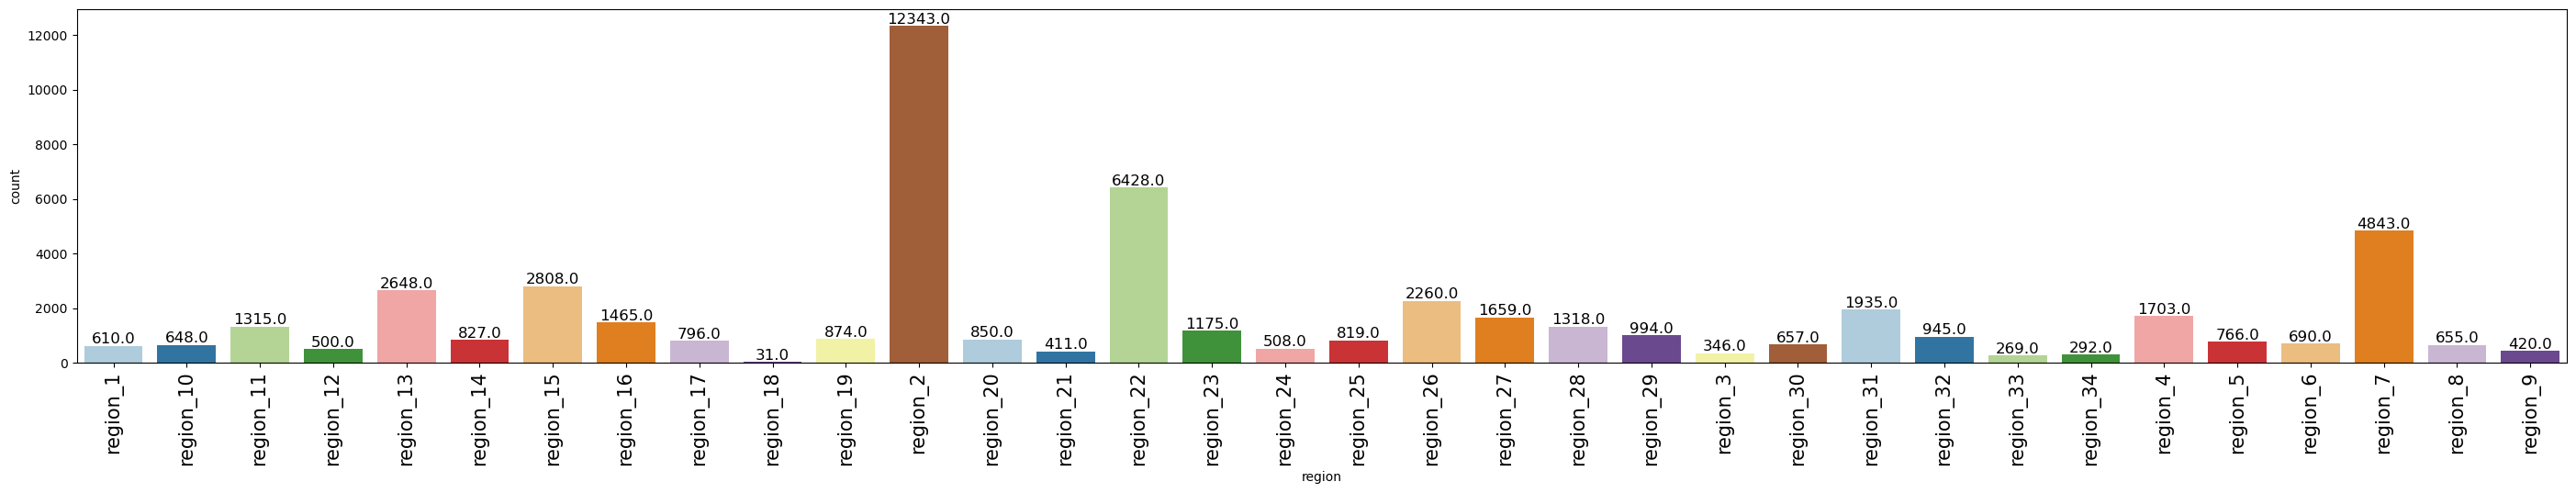

In [66]:
labeled_barplot(data, 'region') ## Complete the code to create labeled_barplot for 'region'  

#### Observations on target variable

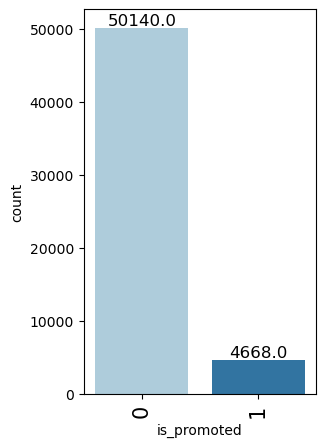

In [68]:
labeled_barplot(data, "is_promoted") ## Complete the code to create labeled_barplot for 'is_promoted'  

### Bivariate Analysis

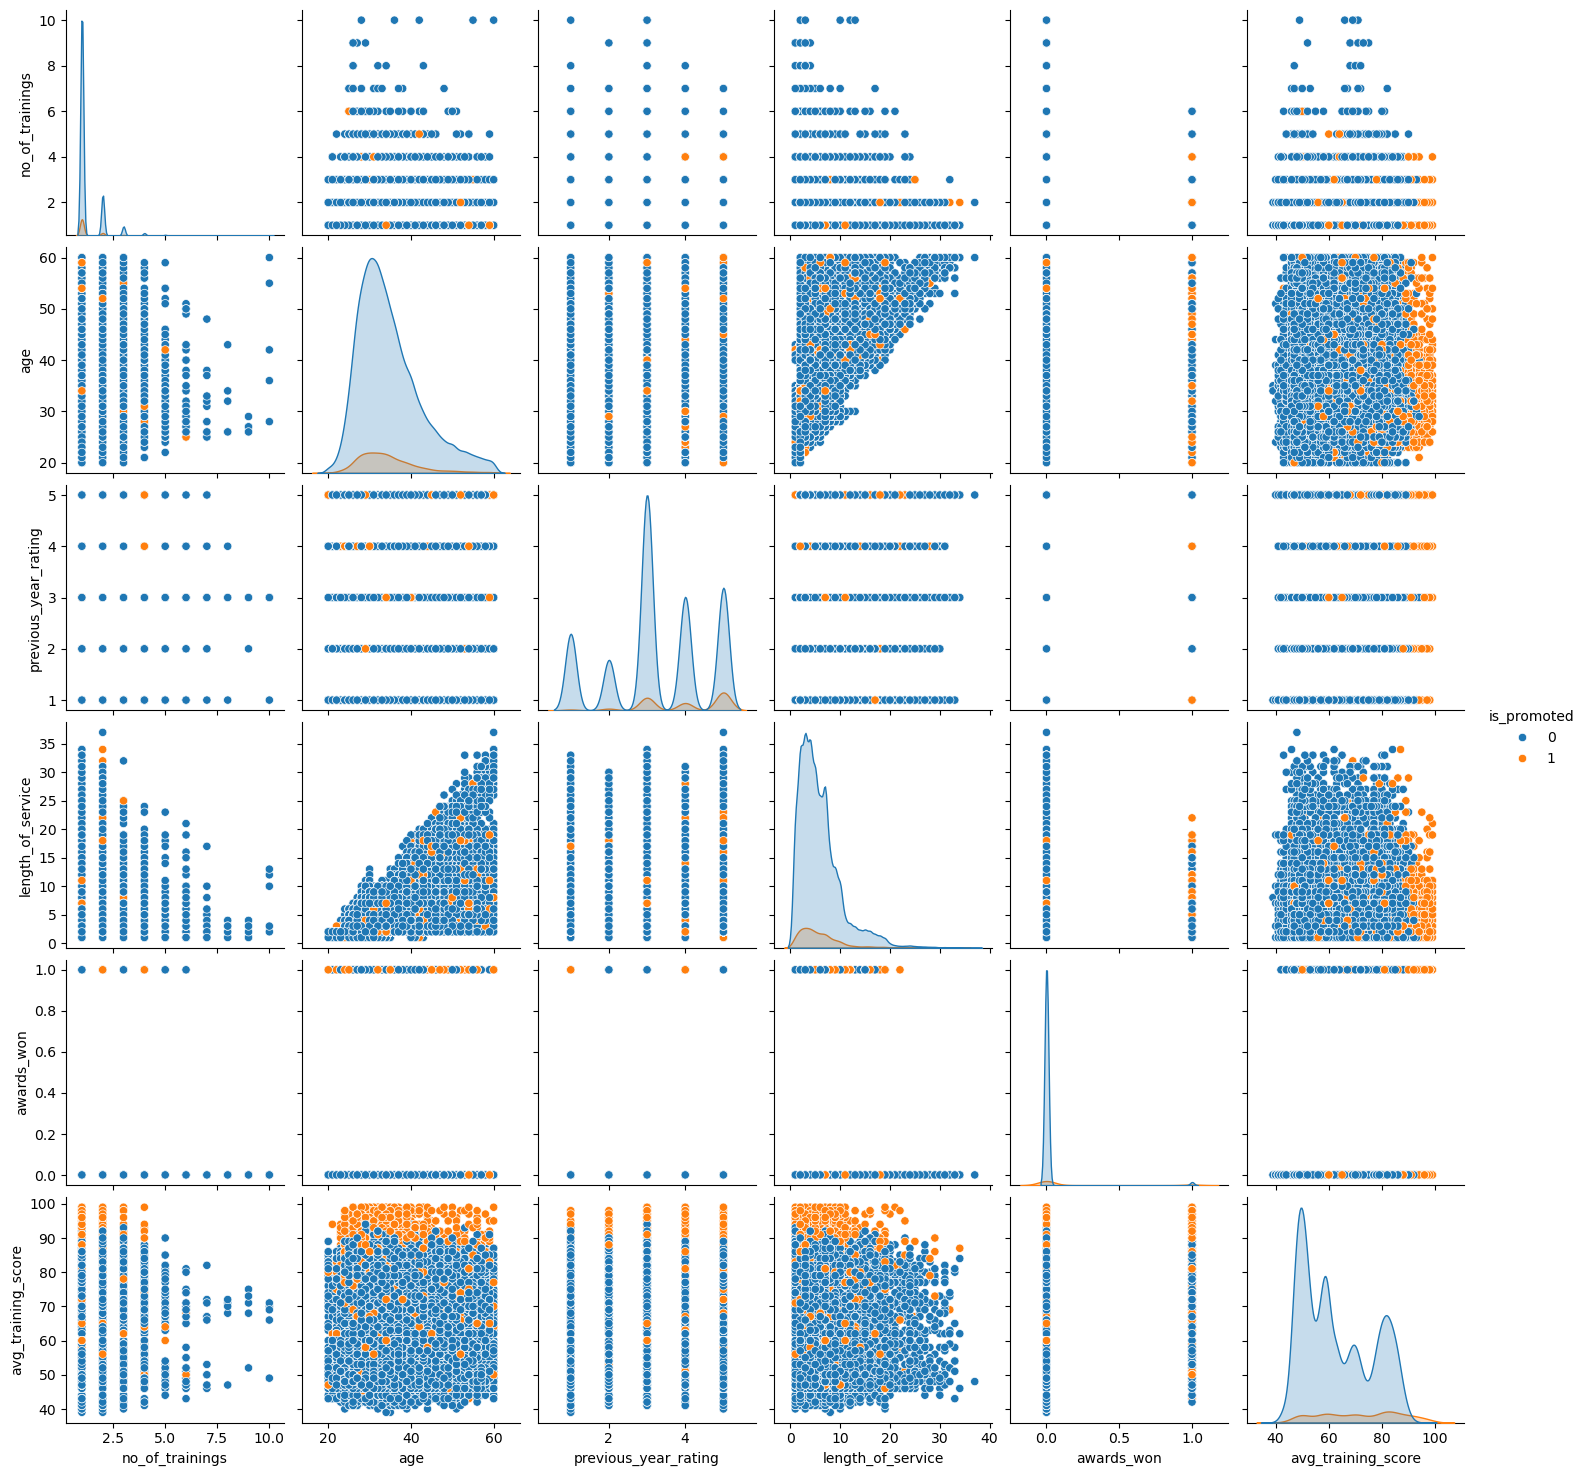

In [70]:


sns.pairplot(data, hue="is_promoted") # allows to visualize relationships between mulitple variables in dataset. Creates a grid of scatter plots for each part of numerical feature sin Dataframe. 

# means a systematic way to visualize all the possible relationships between pairs of variables in your dataset. Gives comprehensive overview of how your data interacts

#### Target variable vs Age

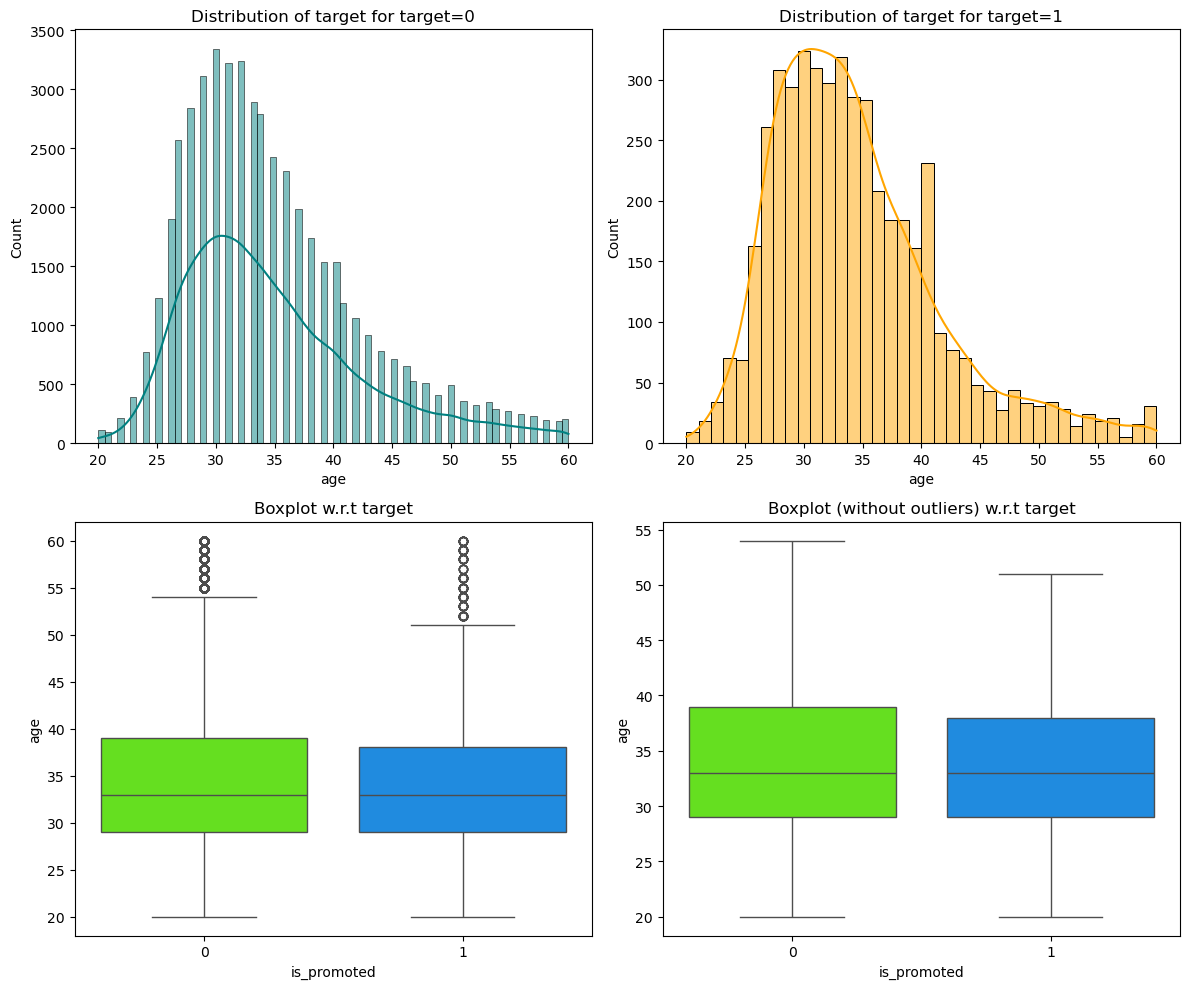

In [72]:
# helps to see how the values of age vary with respect to target variable (is_promoted) 
distribution_plot_wrt_target(data, "age", "is_promoted")  

**Let's see the change in length of service (length_of_service) vary by the employee's promotion status (is_promoted)?**

#### Target variable vs Length of Service

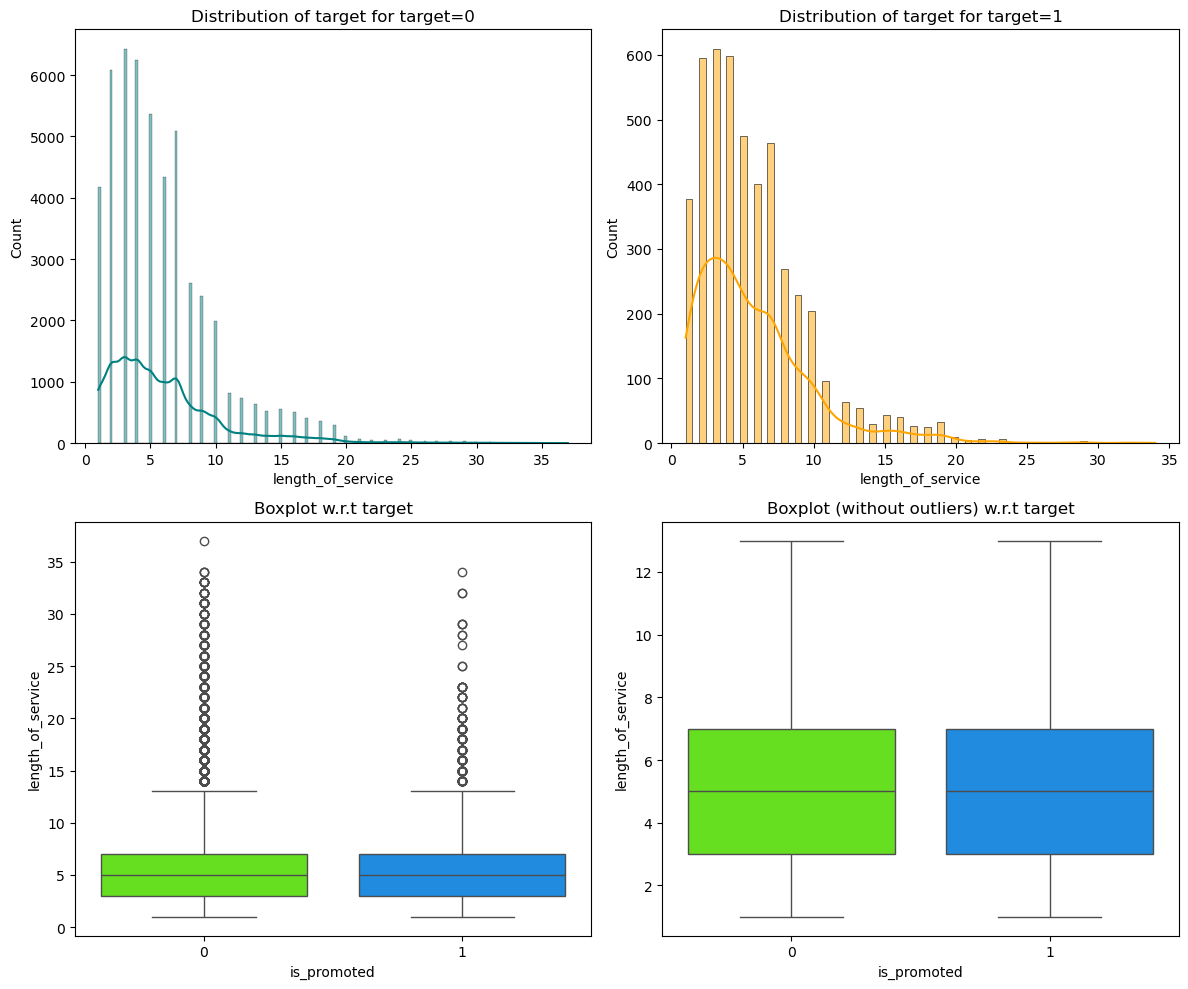

In [75]:
# helps to see how the values of is_promoted vary with respect to length_of_service
distribution_plot_wrt_target( data, "length_of_service", "is_promoted") ## Complete the code to create distribution_plot for length_of_service vs is_promoted 

#### Target variable vs Average Training Score

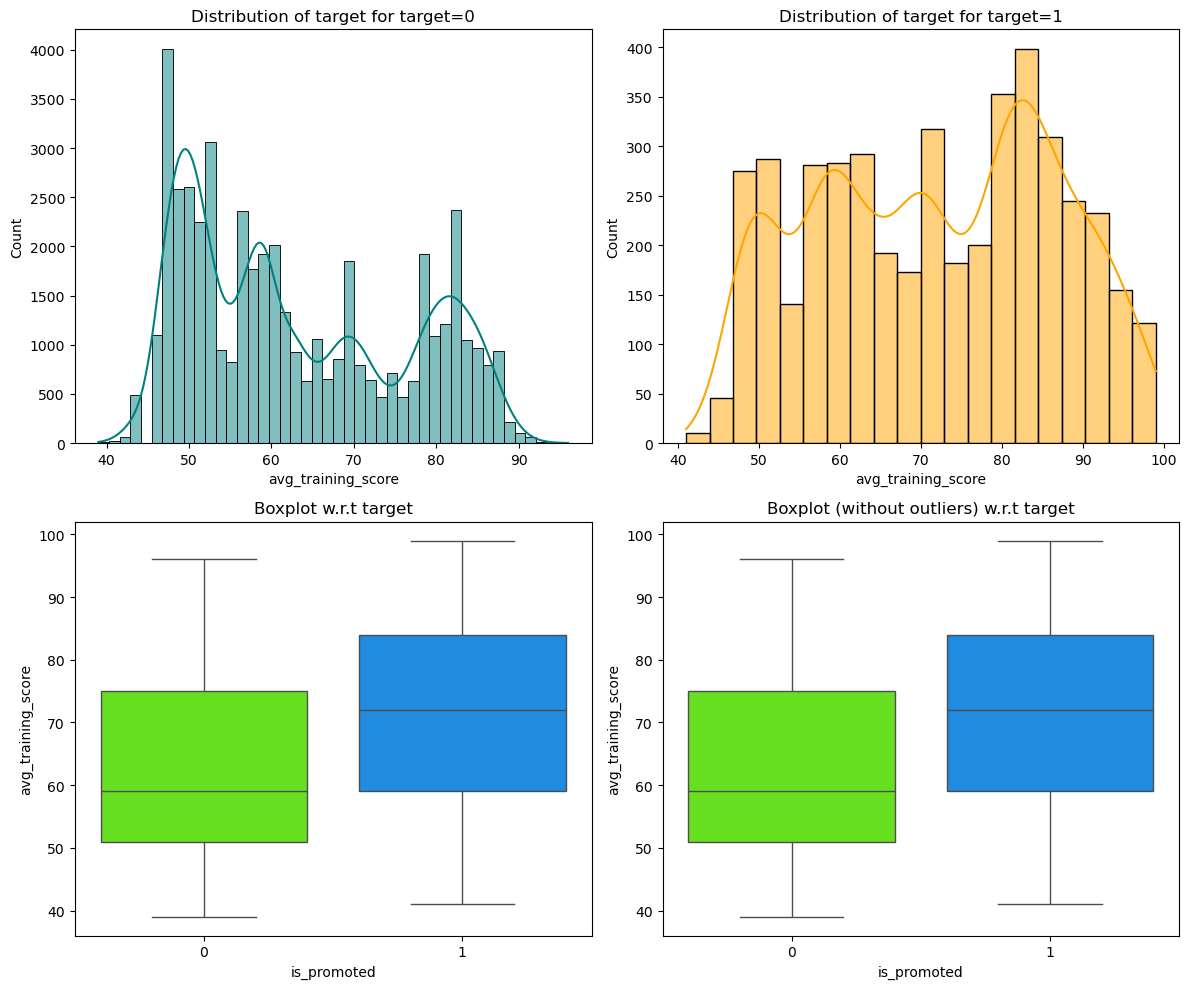

In [77]:
# how avg_training_score affects target variable is_promoted
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted") ## Complete the code to create distribution_plot for avg_training_score vs is_promoted 

# Categorical Data 
After analyzing the numerical data, we are going to analyze the categorical data and how it affects our target variable is_promoted

#### Target variable vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


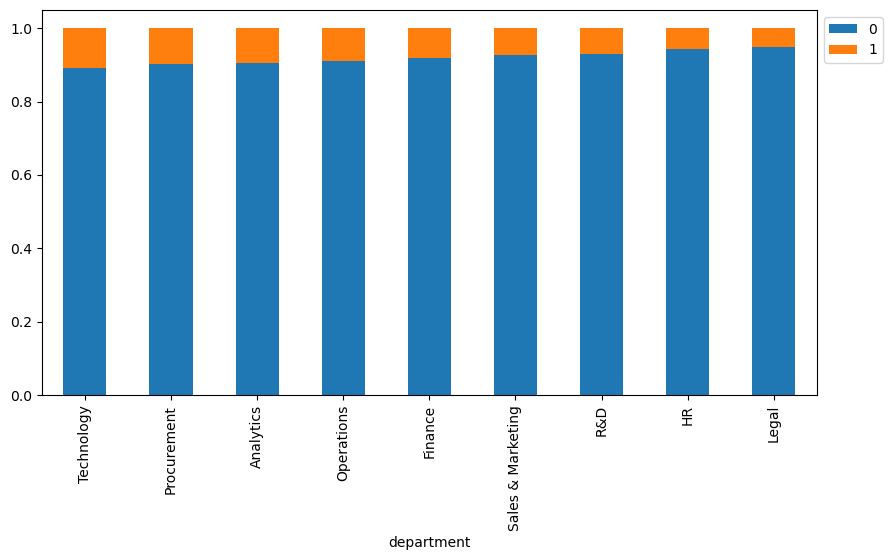

In [80]:
# create a stacked bar plot to visualize the relationship between the department and target variable 
stacked_barplot(data, "department", "is_promoted")   

#### Target variable vs Region

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

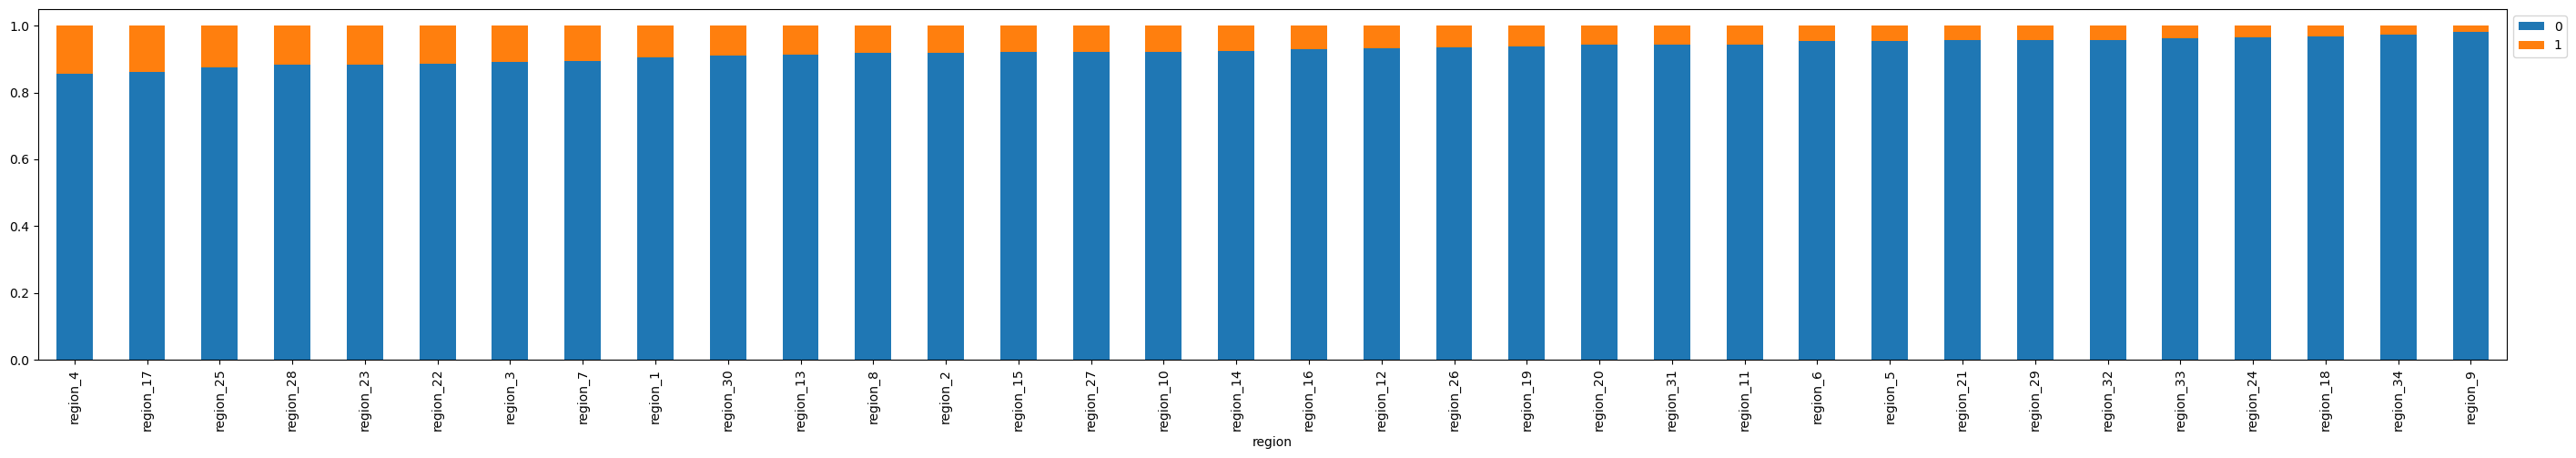

In [82]:
# create a stacked bar plot to visualize the relationship between region and target variable 
stacked_barplot(data, "region", "is_promoted") 

#### Target variable vs Education

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


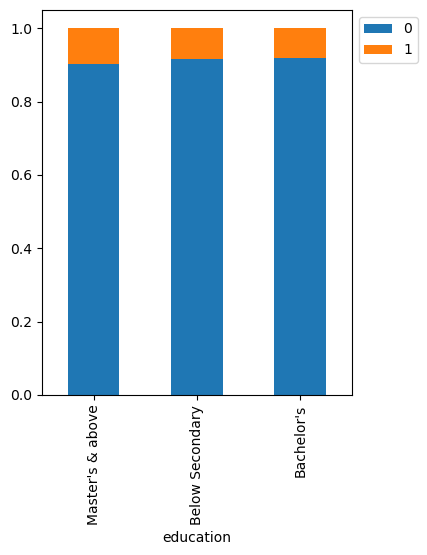

In [84]:
# create a stacked bar plot to visualize the relationship between the education and target variable 
stacked_barplot(data,"education", "is_promoted")  

#### Target variable vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


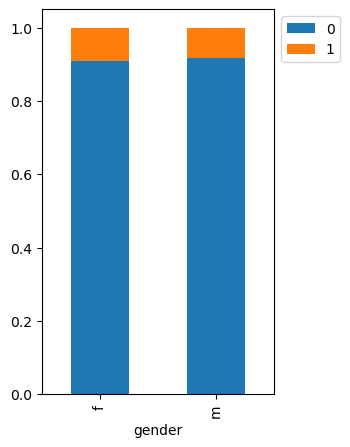

In [86]:
# create a stacked bar plot to visualize the relationship between the department and target variable 
stacked_barplot(data,"gender", "is_promoted")

#### Target variable vs Recruitment Channel

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


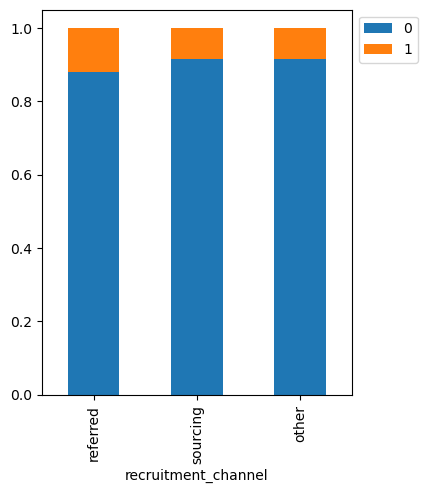

In [88]:
# create a stacked bar plot to visualize the relationship between the recruitment_channel and target variable 
stacked_barplot(data,"recruitment_channel", "is_promoted") ## Complete the code to create distribution_plot for recruitment_channel vs is_promoted 

**Let's see the previous rating(previous_year_rating) vary by the employee's promotion status (is_promoted)**

#### Target variable vs Previous Year Rating

is_promoted               0     1    All
previous_year_rating                    
 All                  46355  4329  50684
5.000                  9820  1921  11741
3.000                 17263  1355  18618
4.000                  9093   784   9877
2.000                  4044   181   4225
1.000                  6135    88   6223
------------------------------------------------------------------------------------------------------------------------


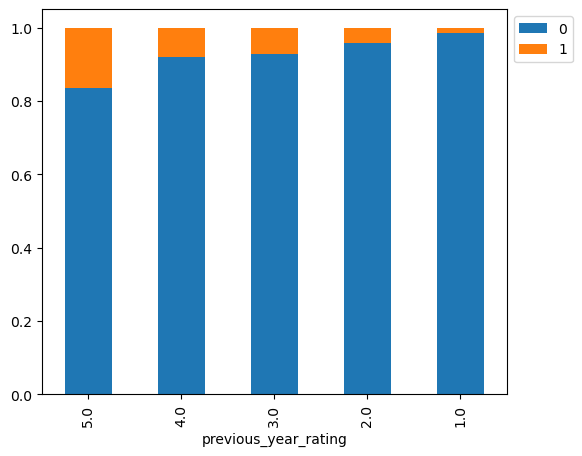

In [91]:
# create a stacked bar plot to visualize the relationship between previous_year_rating and target variable 
stacked_barplot(data,"previous_year_rating", "is_promoted") ## Complete the code to create distribution_plot for previous_year_rating vs is_promoted 

#### Target variable vs Awards Won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


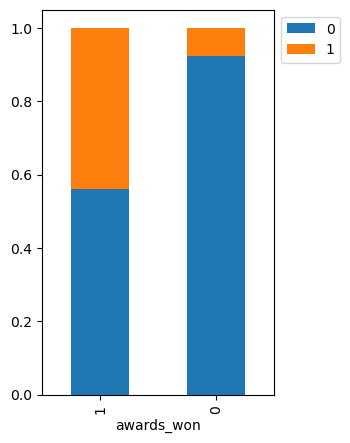

In [93]:
# create a stacked bar plot to visualize the relationship between awards_won and target variable 
stacked_barplot(data,"awards_won", "is_promoted") ## Complete the code to create distribution_plot for awards_won vs is_promoted 

<Axes: xlabel='awards_won', ylabel='avg_training_score'>

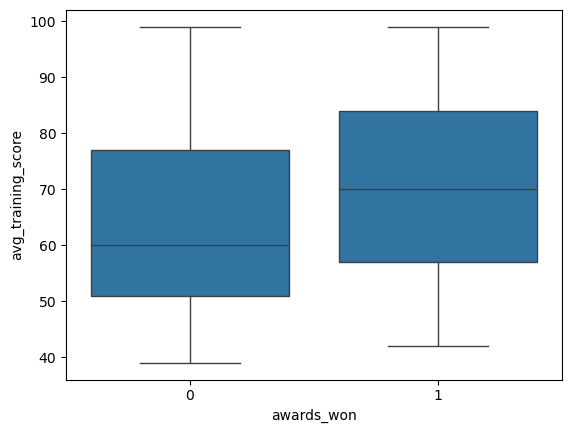

In [94]:
# creates a box plot to visualize the distribution of the numerical variable avg_training_score for each category of awards_won
sns.boxplot(data=data, x="awards_won", y="avg_training_score") 

**Let's see the attributes that have a strong correlation with each other**

### Correlation Heatmap

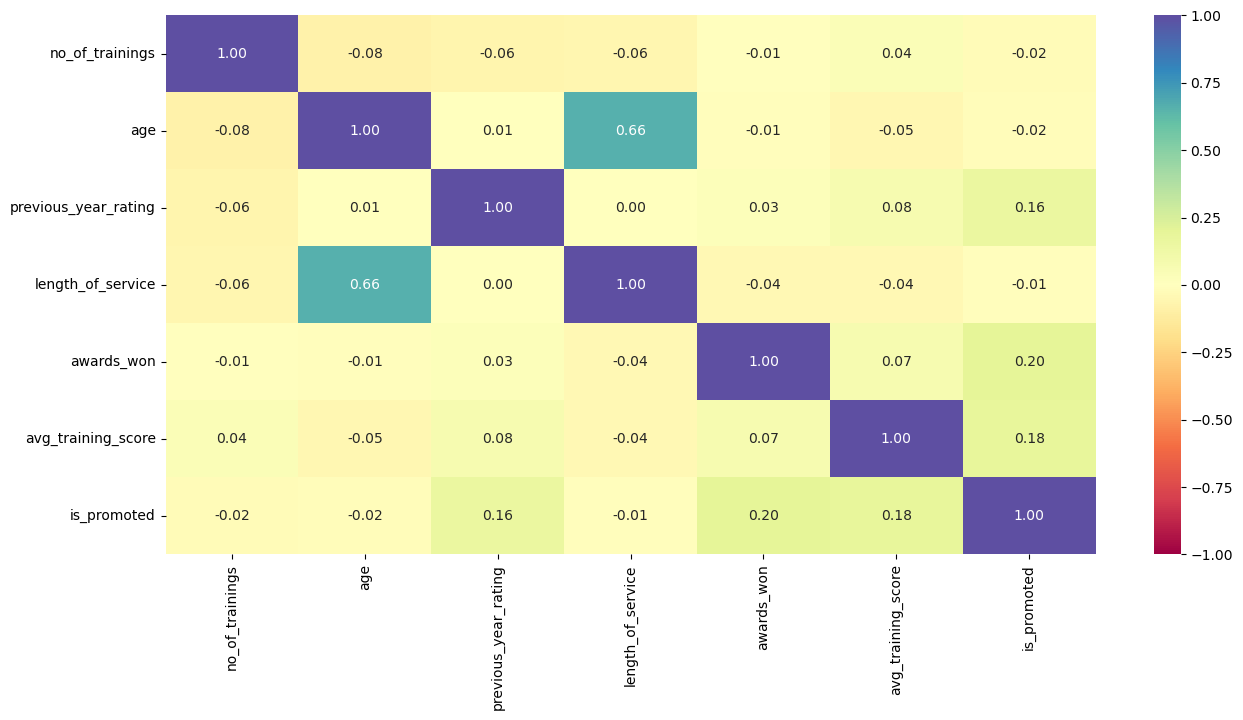

In [97]:
# performs a correlation analysis on numerical features in the dataset and visualizes the results in a heatmap. 

# Select only numerical features for correlation analysis


numerical_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(15, 7))
# computes only the pairwise correlation coefficients between numerical columns. 
# creating a heatmap to visually represent the correlation matrix
# used to explore relationships between features, detect multicollinearity, feature engineering, and understanding data structure
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show() 

# Data analysis and Insights

- A lot of the data is greatly right skewed with no_ of_training, age, length_of_service, and avg_training_score. 
- The rest of the data is mostly evenly distributed with one column way higher than the other.
- The higher the age, length of service, awards won and avg_traning score the more likely someone is to get promoted. 
- Length of service and age are the most highly correlated variables logistically.  



## Data Preprocessing

In [100]:
data1 = data.copy() # Making a copy of the data     

### Train-Test Split

In [102]:
# To separate the X and Y variables.
# The X creates a new DataFrame and drops the "is_promoted" from the original DataFrame data1. The axis = 1 is used to specify that you want to drop a column not a row. 
# Resulting X Dataframe contains all columns from data 1 except "is_promoted" which is likely being removed because it will serve as the target (dependent) variable for machine learning.
# Used to separate the X features and Y target. 
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]        

In [103]:
# Splitting data into training and validation set:

# splitting the sets early ensures that no information from the test or validation set leaks into the training process, which would result in overly optimistic performance metrics. 
# Two-step data splitting process, ensuring a division of data into training, validation, and test sets. 
# ensures fair evaluation, prevents data leakage, and supports model development and hyperparameter tuning.
from sklearn.model_selection import train_test_split

# splits the data into a training and temporary set. The first one splits the data into 80% training and 20% for further splitting
# indicates that 20% of the original dataset will be allocated to x_temp and y_temp , while remaining 80% will be allocated to x_train and y_train
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) ## Complete the code to split the data into train test in the ratio 80:20

# further splits the temporary set into a validation and test set. Takes the remaining 20 percent and splits into testing and validation
# indicates that 25% percent of the temporary set will go into the validation set while the remaininig 75 will go in the test set.  
# random_state is used in both cases to make sure that the split is consistent across runs
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)        

(43846, 11) (2741, 11) (8221, 11)


### Missing value imputation

In [105]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")          

In [106]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data
X_val[["education"]]  = X_val[["education"]].fillna('_______') ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[["education"]] = imputer_mode.transform(X_test[["education"]]) ## Complete the code to impute missing values in X_test


X_test[["education"]] = X_test[["education"]].fillna('_______') ## Complete the code to impute missing values in X_test 


In [107]:
# Fit and transform the training data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_val[["previous_year_rating", "avg_training_score"]]
)

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_test[["previous_year_rating", "avg_training_score"]]
) 

In [108]:
# Checking that no column has missing values in train, validation and test sets after imputation
print(X_train.isnull().sum())
print("-" * 30)
print(X_val.isnull().sum())
print("-" * 30)
print(X_test.isnull().sum())          

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


## Encoding categorical variables

In [110]:
# applying one-hot encoding to the feature sets so that they are a series of binary variables. Removing one of the columns to avoid multicollinearity
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape, X_test.shape)

(43846, 52) (2741, 53) (8221, 52)
(43846, 52) (8221, 52)


## Building the model 

### Model evaluation criterion

**Model can make wrong predictions as:**

- Predicting an employee should get promoted when he/she should not get promoted
- Predicting an employee should not get promoted when he/she should get promoted

**Which case is more important?**

- Both cases are important here as not promoting a deserving employee might lead to less productivity and the company might lose a good employee which affects the company's growth. Further, giving promotion to a non-deserving employee would lead to loss of monetary resources and giving such employee higher responsibility might again affect the company's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

- Bank would want `F1-score` to be maximized, as both classes are important here. Hence, the focus should be on increasing the F1-score rather than focusing on just one metric i.e. Recall or Precision.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [115]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf  

In [116]:
# defining the confusion matrix that will be created for each model 
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")   

### Model Building - Original Data

In [118]:
# evaluates the performance of multiple machine learning models using cross-validation and a validation set. 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Ensure consistent preprocessing
X_val = X_val.reindex(columns=X_train.columns)
models = []  # Empty list to store all the models

# Appending models into the list creating a random state of a lot of different types of models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("SVM", SVC(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Define scorer
scorer = 'accuracy'

# Cross-validation and performance evaluation
print("\nCross-Validation Score:\n")

# evaluating multiple machine learning models using cross-validation on training data and computing the recall score on the validation data
# first loop evaluates the performance of each model using 5-fold stratified cross-validation on the training dataset
# iterating through all the models, defining the cross-validation strategy, performing cross-validation, storing results, and printing the mean performance. 
# estimates how well the model will generalize to unseen data by evaluating it on multiple splits of the training set and provides a robust metric by averaging performance across folds
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    # adding and creating to the results1 and names list
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")
# evaluates the trained models on the validation set using recall score as the metric
# loop trains each model on the entire training set using the fit method to learn the relationships and patterns in the data
# making predictions on predictions on the validation data. Computing the recall score for the validation set and printing it out at the end
for name, model in models:
# used for model training, learning relationships between features, and targets the foundation for prediction
    model.fit(X_train, y_train)
# evaluates the performance of the trained model on the validation set (X_val) using recall as an evaluation metric
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores)) 


Cross-Validation Score:

Bagging: 0.9297768871450728
Random Forest: 0.9320120050769705
AdaBoost: 0.925489211047573
Logistic Regression: 0.9195822383011159
SVM: 0.9142453129630359

Validation Performance:

Bagging: 0.34051724137931033
Random Forest: 0.28448275862068967
AdaBoost: 0.19827586206896552
Logistic Regression: 0.125
SVM: 0.0


In [119]:
# another updated way of tuning all of the models and evaluating their performance
from sklearn.metrics import recall_score, classification_report

# Step 1: Handle Class Imbalance Using SMOTE
sm = SMOTE(sampling_strategy=1, random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Step 2: Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)

# Step 3: Update Model List with Hyperparameter Tuning for Some Models
models = []

# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=1), rf_param_grid, scoring='recall', cv=5)
rf_grid.fit(X_train_scaled, y_train_balanced)
best_rf = rf_grid.best_estimator_

# Logistic Regression with balanced class weight
log_reg = LogisticRegression(random_state=1, class_weight='balanced')

# SVM with balanced class weight and tuned parameters
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(random_state=1, class_weight='balanced'), svm_param_grid, scoring='recall', cv=5)
svm_grid.fit(X_train_scaled, y_train_balanced)
best_svm = svm_grid.best_estimator_

# Add models to the list
models.append(("Random Forest (Tuned)", best_rf))
models.append(("Logistic Regression", log_reg))
models.append(("SVM (Tuned)", best_svm))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

# Step 4: Evaluate Validation Performance
print("\nValidation Performance:\n")

for name, model in models:
    # Train the model on the balanced and scaled training set
    model.fit(X_train_scaled, y_train_balanced)
    
    # Evaluate recall on the scaled validation set
    y_val_pred = model.predict(X_val_scaled)
    scores = recall_score(y_val, y_val_pred)
    
    print(f"{name}: Recall Score = {scores:.4f}")
    print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))



Validation Performance:

Random Forest (Tuned): Recall Score = 0.2974
              precision    recall  f1-score   support

Not Promoted       0.94      0.98      0.96      2509
    Promoted       0.55      0.30      0.39       232

    accuracy                           0.92      2741
   macro avg       0.74      0.64      0.67      2741
weighted avg       0.91      0.92      0.91      2741

Logistic Regression: Recall Score = 0.3879
              precision    recall  f1-score   support

Not Promoted       0.94      0.96      0.95      2509
    Promoted       0.48      0.39      0.43       232

    accuracy                           0.91      2741
   macro avg       0.71      0.67      0.69      2741
weighted avg       0.91      0.91      0.91      2741

SVM (Tuned): Recall Score = 0.3491
              precision    recall  f1-score   support

Not Promoted       0.94      0.97      0.95      2509
    Promoted       0.49      0.35      0.41       232

    accuracy                     

# Analysis of Results and Performance
The validation set is completly separate from the training data, representing unseen data.
This set is not using cross-validation because it is evaluated on a completely separate validation set. 
Cross-validation evaluates the model's generalization on the training data only, while validation measures generalization on unseen data.
Overfitted models tend to fail on the validation set, resulting in poor performance.
To fix the issue of the validation performance, we can handle class imbalance and hyperparameter tuning, use consistent metrics, analyze feature engineering, or consider alternative validation strategies. 

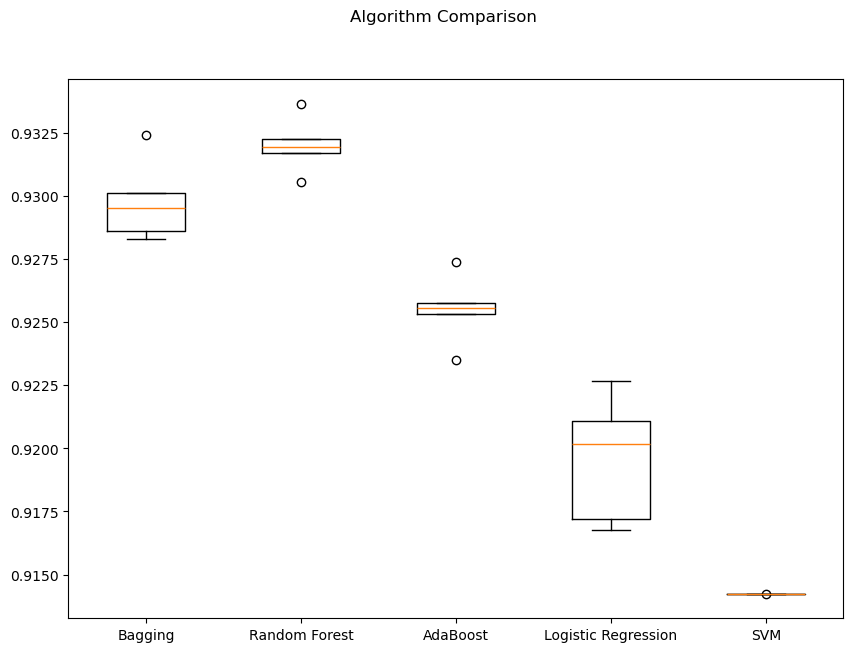

In [121]:
# Creating a boxplot to visualize and compare the cross-validation (CV) scores for all models in the models list
# creating a figure for the plot
fig = plt.figure(figsize=(10, 7))
# initializes a new figure for the plot with a specific size and title
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
# creates a box plot for the cross-validation results stored in results 1
# Each element in results1 is a list or array of CV scores for a specific model 
plt.boxplot(results1)
# labels the x-axis ticks with the names of the models (stored in names) 
ax.set_xticklabels(names)
  
plt.show()   

### Model Building - Oversampled Data |

In [123]:
# The labels respond to the distribution of the target classes in the dataset y_train before and after oversampling 
# yes would be eligible for prediction with no being not eligible for prediction for the train dataset
# displays the counts of each class in y_train before oversampling 
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
# code applies SMOTE to balance the imbalanced dataset by generating synthetic samples for the minority class in the training set. 
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique that balances imbalanced dataset by oversampling minority class through generation of synthetic samples
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)                                                           


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape)) 

Before Oversampling, counts of label 'Yes': 3760
Before Oversampling, counts of label 'No': 40086 

After Oversampling, counts of label 'Yes': 40086
After Oversampling, counts of label 'No': 40086 

After Oversampling, the shape of train_X: (80172, 52)
After Oversampling, the shape of train_y: (80172,) 



In [124]:
## Complete the code to build models on oversampled data
## Note - Take reference from the original models built above 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Print class distribution before oversampling
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Apply SMOTE to oversample the minority class using .fit_resample
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

# Print new dataset shapes
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

# Build and evaluate models on oversampled data
results2 = []  # Empty list to store CV scores on oversampled data
names = []  # Empty list to store model names

print("\nCross-Validation Cost on Oversampled Data:\n")
 # Evaluating multiple ML models using 5-fold stratified cross-validation on the oversampled training data 
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # estimator is the model that is being evaluated, calculating the accuracy for each fold
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold)
    # stores the model names and cross-validation and model names results for further analysis to the array that we created earlier
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance on Original Validation Data:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

Before Oversampling, counts of label 'Yes': 3760
Before Oversampling, counts of label 'No': 40086 

After Oversampling, counts of label 'Yes': 40086
After Oversampling, counts of label 'No': 40086 

After Oversampling, the shape of train_X: (80172, 52)
After Oversampling, the shape of train_y: (80172,) 


Cross-Validation Cost on Oversampled Data:

Random Forest (Tuned): 0.9600733380761393
Logistic Regression: 0.8624584420096693
SVM (Tuned): 0.8835628584549381
Bagging: 0.9489472631804905
AdaBoost: 0.861734846348298

Validation Performance on Original Validation Data:

Random Forest (Tuned): 0.29310344827586204
Logistic Regression: 0.3793103448275862
SVM (Tuned): 0.3793103448275862
Bagging: 0.2974137931034483
AdaBoost: 0.4482758620689655


# Analysis and Results on Performance for Oversampled Data
We created the 5 same models as before using SMOTE, an oversampling technique to balance the dataset
Random Forest and Bagging achieve the highest accuracy scores, due to their ensemble-based structure that handles complex patterns well. 
The overall cross-validation scores indicate that the models perform well on oversampled training data. 
SVM achieves the highest recall because of its ability to create robust decision boundaries even with imbalance.
Random Forest and Bagging overfit underperforming on the validation set. 
High accuracy on oversampled data does not reflect performance on validation set. 




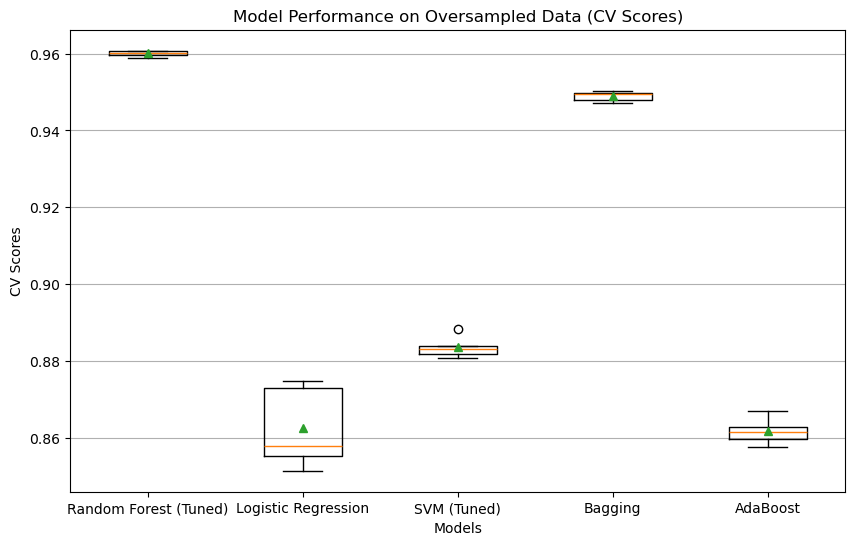

In [126]:
# Creating a boxplot to visualize and compare the cross-validation (CV) scores for all models in the models list
# creating a figure for the plot
import matplotlib.pyplot as plt
# initializes a new figure for the plot with a specific size and title
plt.figure(figsize=(10, 6))
# creates a box plot for the cross-validation results stored in results 2, each element is a list or array of CV scores for a specific model
plt.boxplot(results2, labels=names, showmeans=True)
# giving the model title and the labels for x and y 
plt.title("Model Performance on Oversampled Data (CV Scores)")
plt.xlabel("Models")
plt.ylabel("CV Scores")
plt.grid(axis="y")
plt.show()


### Model Building - Undersampled Data

In [128]:
# applies random undersampling to handle class imbalance by reducing the number of samples in the majority class, resulting in a balanced dataset
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)  

In [129]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))
# 2-D array where rows are samples and columns are features. 
# Each row represents a single sample (or instance) of our dataset, and columns represent a feature or attribute of those samples
print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
# a 1D array is outputted where each element is the label for the corresponding sample
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape)) 

Before Under Sampling, counts of label 'Yes': 3760
Before Under Sampling, counts of label 'No': 40086 

After Under Sampling, counts of label 'Yes': 3760
After Under Sampling, counts of label 'No': 3760 

After Under Sampling, the shape of train_X: (7520, 52)
After Under Sampling, the shape of train_y: (7520,) 



In [130]:
## Note - Take reference from the original models built above
# Build models on undersampled data
results_un = []  # List to store CV scores for undersampled data
names_un = []    # List to store model names

print("\nCross-Validation Performance on Undersampled Data:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance on Original Validation Data:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))   


Cross-Validation Performance on Undersampled Data:

Random Forest (Tuned): 0.7071808510638298
Logistic Regression: 0.6861702127659575
SVM (Tuned): 0.6804521276595745
Bagging: 0.6938829787234042
AdaBoost: 0.7021276595744681

Validation Performance on Original Validation Data:

Random Forest (Tuned): 0.7112068965517241
Logistic Regression: 0.75
SVM (Tuned): 0.728448275862069
Bagging: 0.5991379310344828
AdaBoost: 0.7801724137931034


# Analysis and Results on Performance for Undersampled Data
Random Forest performs well due to ensemble nature and ability to handle noisy data. 
Simpler models like Logistic Regression and SVM struggle to generalize because of reduced dataset size and information loss during undersampling. 
Random Forest and Bagging show better recall due to ensemble structure, while Logistic Regression and SVM underperform due to the loss of majority class samples during undersampling. 
Recall scores are generally lower than cross-validation scores, indicating reduced generalization to the original imbalanced dataset. 



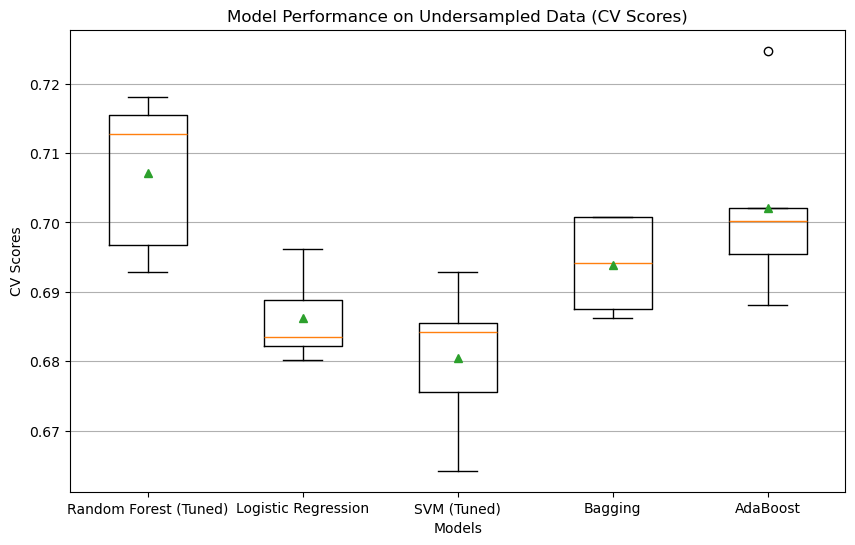

In [132]:
import matplotlib.pyplot as plt

# Create a boxplot to visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(results_un, labels=names_un, showmeans=True)
plt.title("Model Performance on Undersampled Data (CV Scores)")
plt.xlabel("Models")
plt.ylabel("CV Scores")
plt.grid(axis="y")
plt.show() 

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using Undersampled data 

In [136]:
# Defines a preprocessing pipeline that applies a sequence of transformations to the input data (X_train) to prepare it for model training
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale features
    ('feature_selector', SelectKBest(score_func=f_classif, k=11))  # Select top 11 features
])

# Fit the pipeline on the original training data
preprocessing_pipeline.fit(X_train, y_train)   

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('feature_selector', SelectKBest(k=11))])

In [137]:
# Define a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale features
    ('feature_selector', SelectKBest(score_func=f_classif, k=11))  # Select top 11 features
])

# Fit the pipeline on the original training data
preprocessing_pipeline.fit(X_train, y_train)

# Define AdaBoost model with 'SAMME' algorithm
Model = AdaBoostClassifier(
    random_state=1,
    algorithm="SAMME"
)

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Perform hyperparameter tuning with limited parallelism
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_jobs=1,  # Limit parallel jobs to avoid macOS-related issue
    n_iter=50,
    scoring="f1_macro",
    cv=5,
    random_state=1
)

# Train AdaBoost with undersampled data
randomized_cv.fit(X_train_un, y_train_un)

# Output best parameters and F1-score
print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}")


Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7097667074117935


In [169]:
""" Creating a new pipeline with the best parameters obtained from hyperparameter tuning
defining the AdaBoost Classifier with the best hyperparameters obtained from hyperparameter tuning
With 90 weak learners that AdaBoost will train iteratively, learning_rate determines how much the weak learner contributes to the final model.
specifies the weak learner as a decision tree with a max depth of 3 """
# Define the tuned AdaBoost Classifier with the best parameters obtained from hyperparameter tuning
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Train the model on the undersampled training dataset
tuned_adb1.fit(X_train_un, y_train_un)

# Print success message
print("Model training completed successfully!")


Model training completed successfully!


In [173]:
# Define the tuned AdaBoost Classifier with the best parameters obtained from hyperparameter tuning
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Train the model on the undersampled training dataset
# Use the correct variable names for the undersampled data
tuned_adb1.fit(X_train_un, y_train_un)

# Print success message
print("Model training completed successfully!")


Model training completed successfully!


In [175]:
# Apply the preprocessing pipeline to the undersampled and oversampled data
X_train_un_preprocessed = preprocessing_pipeline.transform(X_train_un)
X_train_over_preprocessed = preprocessing_pipeline.transform(X_train_over)

# Convert the transformed data back into DataFrames with appropriate column names
X_train_un_preprocessed = pd.DataFrame(
    X_train_un_preprocessed, 
    columns=preprocessing_pipeline.get_feature_names_out()
)

X_train_over_preprocessed = pd.DataFrame(
    X_train_over_preprocessed, 
    columns=preprocessing_pipeline.get_feature_names_out()
)

# Ensure columns of undersampled and oversampled datasets align
X_train_un_preprocessed = X_train_un_preprocessed.reindex(
    columns=X_train_over_preprocessed.columns, 
    fill_value=0
)

# Train the AdaBoost model with undersampled data
tuned_adb1.fit(X_train_un_preprocessed, y_train_un)

# Evaluate the model on validation data
X_val_preprocessed = preprocessing_pipeline.transform(X_val)
X_val_preprocessed = pd.DataFrame(
    X_val_preprocessed,
    columns=preprocessing_pipeline.get_feature_names_out()
)

# Predict and evaluate on validation set
y_val_pred = tuned_adb1.predict(X_val_preprocessed)
print(f"Recall on validation set: {recall_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Recall on validation set: 0.6078
              precision    recall  f1-score   support

Not Promoted       0.96      0.78      0.86      2509
    Promoted       0.21      0.61      0.31       232

    accuracy                           0.77      2741
   macro avg       0.58      0.70      0.59      2741
weighted avg       0.89      0.77      0.81      2741



In [187]:
# Apply preprocessing pipeline to training data
X_train_un_preprocessed = preprocessing_pipeline.fit_transform(X_train_un, y_train_un)

# Train AdaBoost model on the preprocessed training data
tuned_adb1.fit(X_train_un_preprocessed, y_train_un)

# Apply the same preprocessing pipeline to the validation data (transform only, no fit)
X_val_preprocessed = preprocessing_pipeline.transform(X_val)

# Predict on validation set
y_val_pred = tuned_adb1.predict(X_val_preprocessed)

# Evaluate the model
print(f"Recall on validation set: {recall_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Recall on validation set: 0.6250
              precision    recall  f1-score   support

Not Promoted       0.96      0.78      0.86      2509
    Promoted       0.21      0.62      0.32       232

    accuracy                           0.77      2741
   macro avg       0.58      0.70      0.59      2741
weighted avg       0.89      0.77      0.82      2741



In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define pipelines for numeric and categorical data
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Debug: Inspect numeric and categorical transformations
print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

# Fit and transform the data
X_preprocessed = preprocessing_pipeline.fit_transform(X)

# Debug: Check the shape of transformed data
print(f"Transformed data shape: {X_preprocessed.shape}")

# Get feature names dynamically
try:
    numeric_features = list(numeric_columns)
    categorical_features = list(
        preprocessing_pipeline.named_transformers_["cat"]
        .named_steps["onehot"]
        .get_feature_names_out(categorical_columns)
    )
    feature_names = numeric_features + categorical_features

    # Ensure the transformed data matches the feature names
    assert X_preprocessed.shape[1] == len(feature_names), (
        f"Transformed data has {X_preprocessed.shape[1]} features, "
        f"but {len(feature_names)} feature names were provided."
    )

    # Convert to DataFrame
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
    print("Preprocessing completed successfully!")
    print(f"Shape of preprocessed DataFrame: {X_preprocessed_df.shape}")

except AssertionError as e:
    print(f"AssertionError: {e}")
    print("Please check the pipeline configuration or input data.")
except Exception as e:
    print(f"Unexpected error: {e}")


Numeric columns: Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score'],
      dtype='object')
Categorical columns: Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')
Transformed data shape: (54808, 57)
Unexpected error: Shape of passed values is (54808, 1), indices imply (54808, 57)


In [214]:
X_train_un = X_train_un.reindex(columns=X.columns, fill_value=0)
X_val = X_val.reindex(columns=X.columns, fill_value=0)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
print(f"Expected Columns: {list(X.columns)}")
print(f"Columns in X_train_un: {list(X_train_un.columns)}")

Expected Columns: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']
Columns in X_train_un: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']


In [216]:
# Step 1: Align columns and preprocess
# Ensure consistent columns across all datasets
X_train_un = X_train_un.reindex(columns=X.columns, fill_value=0)
X_val = X_val.reindex(columns=X.columns, fill_value=0)

# Define numeric and categorical columns dynamically
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 2: Define the model
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Step 3: Create and fit the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', tuned_adb1)
])
pipeline.fit(X_train_un, y_train_un)

# Step 4: Evaluate the pipeline
adb1_val = pipeline.score(X_val, y_val)
y_val_pred = pipeline.predict(X_val)
print(f"Validation Accuracy: {adb1_val:.4f}")
print(f"Validation Recall: {recall_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Accuracy: 0.7019
Validation Recall: 0.6336
              precision    recall  f1-score   support

Not Promoted       0.95      0.71      0.81      2509
    Promoted       0.17      0.63      0.26       232

    accuracy                           0.70      2741
   macro avg       0.56      0.67      0.54      2741
weighted avg       0.89      0.70      0.77      2741



In [218]:
""" Applies a previously defined and fitted preprocessing pipeline to transform multiple datasets. Makes sure that all of the datasets 
are preprocessed consistenly with the same steps and parameters learned during pipleline fitting """ 

# Step 1: Align Columns Across All Datasets
X_train_un = X_train_un.reindex(columns=X.columns, fill_value=0)
X_val = X_val.reindex(columns=X.columns, fill_value=0)

# Step 2: Define Preprocessing Pipeline
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 3: Define the Model
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Step 4: Create and Fit the Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', tuned_adb1)
])

# Fit the pipeline on training data
pipeline.fit(X_train_un, y_train_un)

# Step 5: Transform and Evaluate the Validation Data
# Transform validation data with the fitted pipeline
X_val_transformed = pipeline.named_steps['preprocessing'].transform(X_val)

# Predict and Evaluate
y_val_pred = pipeline.predict(X_val)
print(f"Validation Recall: {recall_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Recall: 0.6336
              precision    recall  f1-score   support

Not Promoted       0.95      0.71      0.81      2509
    Promoted       0.17      0.63      0.26       232

    accuracy                           0.70      2741
   macro avg       0.56      0.67      0.54      2741
weighted avg       0.89      0.70      0.77      2741



In [228]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 1: Identify Numeric and Categorical Columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Step 2: Define Preprocessing for Numeric and Categorical Data
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine Numeric and Categorical Pipelines
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 3: Define the Model
tuned_adb2 = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
)

# Step 4: Create the Complete Pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocess data
    ("feature_selection", SelectKBest(score_func=f_classif, k=11)),  # Select top 11 features
    ("model", tuned_adb2)  # AdaBoost model
])

# Step 5: Train the Pipeline
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Pipeline on Validation Data
y_val_pred = pipeline.predict(X_val)
val_accuracy = pipeline.score(X_val, y_val)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Recall: {recall_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Accuracy: 0.9306
Validation Recall: 0.2280
              precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96     10019
    Promoted       0.87      0.23      0.36       943

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962



#### Tuning AdaBoost using original data

In [224]:
# Make sure that we have no missing values in both X and Y before we are ready to make our model 
print(X.isnull().sum())  # If X is a pandas DataFrame
print(y.isnull().sum())  # If y is a pandas Series or DataFrame     

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
dtype: int64
0


In [232]:
# Step 1: Define Numeric and Categorical Columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 2: Define Preprocessing Pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 3: Define the Model with SAMME Algorithm
Model = AdaBoostClassifier(random_state=1, algorithm="SAMME")

# Step 4: Create a Complete Pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", Model)
])

# Step 5: Define Hyperparameter Grid
param_grid = {
    "model__n_estimators": np.arange(10, 110, 10),
    "model__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "model__estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Step 6: Perform RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring="f1_macro",
    cv=5,
    random_state=1
)

# Step 7: Fit RandomizedSearchCV
randomized_cv.fit(X, y)

# Step 8: Display Best Parameters and Score
print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}") 


Best parameters are {'model__n_estimators': 70, 'model__learning_rate': 1, 'model__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.6582844862379493


In [236]:
# Step 1: Define numeric and categorical pipelines
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 2: Define the AdaBoost model
tuned_adb2 = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
)

# Step 3: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocessing step
    ("model", tuned_adb2)  # AdaBoost model
])

# Step 4: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 5: Transform validation data and evaluate
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))

# Optional: Debugging checks to ensure no NaN values
X_train_processed = pipeline.named_steps["preprocessing"].transform(X_train)
X_val_processed = pipeline.named_steps["preprocessing"].transform(X_val)
print(f"NaN in Training Data: {pd.DataFrame(X_train_processed).isnull().sum().sum()}")
print(f"NaN in Validation Data: {pd.DataFrame(X_val_processed).isnull().sum().sum()}") 

Validation Recall: 0.3436
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10019
    Promoted       0.87      0.34      0.49       943

    accuracy                           0.94     10962
   macro avg       0.90      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

NaN in Training Data: 0
NaN in Validation Data: 0


In [246]:
# Step 1: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 2: Define numeric and categorical pipelines
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine numeric and categorical pipelines
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 3: Define the AdaBoost model
tuned_adb = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
)

# Step 4: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", tuned_adb)
])

# Step 5: Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 6: Transform validation data and evaluate
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))

# Step 7: Check for NaN values after preprocessing
X_train_transformed = pipeline.named_steps["preprocessing"].transform(X_train)
X_val_transformed = pipeline.named_steps["preprocessing"].transform(X_val)

# Convert to dense array if necessary
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()
    X_val_transformed = X_val_transformed.toarray()

# Convert to DataFrame for easier inspection
X_train_transformed_df = pd.DataFrame(
    X_train_transformed,
    columns=pipeline.named_steps["preprocessing"].get_feature_names_out()
)
X_val_transformed_df = pd.DataFrame(
    X_val_transformed,
    columns=pipeline.named_steps["preprocessing"].get_feature_names_out()
)

# Check for NaN values
print(f"NaN in Training Data after preprocessing: {X_train_transformed_df.isnull().sum().sum()}")
print(f"NaN in Validation Data after preprocessing: {X_val_transformed_df.isnull().sum().sum()}")

# Optional: Debugging step to print the transformed shapes and ensure consistency
print(f"Shape of Transformed Training Data: {X_train_transformed_df.shape}")
print(f"Shape of Transformed Validation Data: {X_val_transformed_df.shape}") 

Validation Recall: 0.3436
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10019
    Promoted       0.87      0.34      0.49       943

    accuracy                           0.94     10962
   macro avg       0.90      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

NaN in Training Data after preprocessing: 0
NaN in Validation Data after preprocessing: 0
Shape of Transformed Training Data: (43846, 57)
Shape of Transformed Validation Data: (10962, 57)


In [248]:
print(X_train.shape)  # Should match
print(X_val.shape) 

(43846, 11)
(10962, 11)


In [252]:
# Step 1: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 2: Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 3: Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine numeric and categorical pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 4: Define the AdaBoost model
tuned_adb = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
)

# Step 5: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocessing step
    ("model", tuned_adb)  # AdaBoost model
])

# Step 6: Train the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 7: Evaluate the pipeline on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"])) 

Validation Recall: 0.3436
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10019
    Promoted       0.87      0.34      0.49       943

    accuracy                           0.94     10962
   macro avg       0.90      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



#### Tuning Gradient Boosting using undersampled data    

In [266]:
# Assuming X, y, X_train, X_val, y_train, y_val have been defined earlier

# Step 1: Define numeric and categorical pipelines
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 2: Define the AdaBoost model explicitly with algorithm="SAMME"
tuned_adb = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    algorithm="SAMME",  # Explicitly specify SAMME to avoid warnings
    random_state=1
)

# Step 3: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocessing step
    ("model", tuned_adb)  # AdaBoost model
])

# Step 4: Train the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the pipeline on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))

# Step 6: Hyperparameter Tuning with RandomizedSearchCV
param_grid = {
    "model__n_estimators": np.arange(10, 110, 10),
    "model__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "model__estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

randomized_cv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Number of random samples to test
    scoring="f1_macro",
    cv=5,  # 5-fold cross-validation
    random_state=1,
    n_jobs=1  # Utilize all available CPUs
)

# Perform RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Output best parameters and score
print(f"Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_:.4f}")

# Step 7: Evaluate the best model on validation set
y_val_pred = randomized_cv.best_estimator_.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Recall: 0.2301
              precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96     10019
    Promoted       0.87      0.23      0.36       943

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962

Best parameters are {'model__n_estimators': 70, 'model__learning_rate': 1, 'model__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.6626
Validation Recall: 0.2301
              precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96     10019
    Promoted       0.87      0.23      0.36       943

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962



In [299]:
# Function to dynamically extract feature names
def get_feature_names(preprocessor, numeric_columns, categorical_columns):
    """Get feature names from the preprocessing pipeline."""
    try:
        # Numeric feature names
        numeric_features = list(numeric_columns)
        
        # Categorical feature names
        categorical_features = list(
            preprocessor.named_transformers_["cat"]
            .named_steps["onehot"]
            .get_feature_names_out(categorical_columns)
        )
        
        # Combine all feature names
        return numeric_features + categorical_features
    except Exception as e:
        raise RuntimeError(f"Error generating feature names: {e}")

# Function to align transformed data with feature names
def align_data_with_features(transformed_data, feature_names):
    """Align transformed data with expected feature names."""
    df = pd.DataFrame(transformed_data, columns=feature_names)
    return df.reindex(columns=feature_names, fill_value=0)

# Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # Ensure dense output
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Fit the pipeline on training data
preprocessing_pipeline.fit(X_train)

# Extract feature names
feature_names = get_feature_names(preprocessing_pipeline, numeric_columns, categorical_columns)

# Transform validation data
X_val_transformed = preprocessing_pipeline.transform(X_val)

# Align validation data with feature names
X_val_aligned = align_data_with_features(X_val_transformed, feature_names)

# Debug output
print("Preprocessing and alignment successful!")
print(f"Transformed Validation Data Shape: {X_val_aligned.shape}") 


Preprocessing and alignment successful!
Transformed Validation Data Shape: (10962, 57)


In [308]:
# Step 1: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Step 3: Define preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
    ("scaler", StandardScaler())  # Scale numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 4: Define the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Step 5: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocess data
    ("model", gbm_model)  # Gradient Boosting model
])

# Step 6: Define hyperparameter grid
gbm_param_grid = {
    "model__n_estimators": [50, 100, 150],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__max_depth": [3, 5, 7],
    "model__subsample": [0.8, 1.0],
    "model__min_samples_split": [2, 5, 10]
}

# Step 7: Perform hyperparameter tuning
gbm_tuner = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=gbm_param_grid,
    n_iter=50,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Step 8: Fit the tuner on the training data
gbm_tuner.fit(X_train, y_train)

# Step 9: Get the best model
tuned_pipeline = gbm_tuner.best_estimator_

# Step 10: Evaluate on validation data
y_val_pred = tuned_pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


python(96045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation Recall: 0.3304
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.92      0.33      0.49       908

    accuracy                           0.94     10962
   macro avg       0.93      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



The model performs well on the majority class (Not Promoted) but struggles with the minority (Promoted class), evident from the high precision and recall for Not Promoted. Low Recall for Promoted indicates that many Promoted cases are misclassified. High accuracy is a little misleading due to the class imbalance. 

In [330]:
# Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing numeric values
    ("scaler", StandardScaler())                 # Standardize numeric values
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-hot encode categorical variables
])

# Combine preprocessing steps
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Define Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Create a full pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", gbm_model)
])

# Step 2: Undersample the data (handle imbalance)
rus = RandomUnderSampler(random_state=42)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Step 3: Train the pipeline
pipeline.fit(X_train_un, y_train_un)

# Step 4: Score the model
gbm1_train_score = pipeline.score(X_train_un, y_train_un)  # Accuracy on undersampled training set
print(f"Training Accuracy: {gbm1_train_score:.4f}")

# Step 5: Evaluate the model on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Training Accuracy: 0.7473
Validation Recall: 0.6300
              precision    recall  f1-score   support

Not Promoted       0.96      0.81      0.88     10054
    Promoted       0.23      0.63      0.34       908

    accuracy                           0.79     10962
   macro avg       0.59      0.72      0.61     10962
weighted avg       0.90      0.79      0.83     10962



The model performs reasonably well on the training data. However, since the training sample is undersampled it might not represent the model's ability to 
generalize. Model is identifying the Promoted class reasonably well but still misses about one third of the time. The model has high overall accuracy, but it has low precision for Promoted, meaning that the model generates too many false positives for the minority class. Weighted average metrics are heavily influenced by the majority class as it accounts for 90+ percent of the dataset. 

In [350]:
# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Dynamically configure OneHotEncoder
if sklearn.__version__ >= "1.2.0":
    onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
else:
    onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Define pipelines for numeric and categorical data
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", onehot_encoder)
])

# Combine pipelines
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Define model and pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Transform validation data and evaluate
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)

# Output results
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Recall: 0.2599
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.95      0.26      0.41       908

    accuracy                           0.94     10962
   macro avg       0.94      0.63      0.69     10962
weighted avg       0.94      0.94      0.92     10962



The model performs exceptionally well for the majority class, with a perfect recall for the minority class, but poorly for the minority class. The severe imbalance of the dataset with a class distribution of 10,054 vs 908 makes the model only focus on predicting the majority class while greatly neglecting the majority class. 

 ### Tuning Gradient Boosting using original data   

In [352]:
# Step 1: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Step 3: Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
    ("scaler", StandardScaler())                 # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-hot encode categorical features
])

# Combine numeric and categorical pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 4: Define the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Step 5: Create a complete pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocess data
    ("model", gbm_model)                        # Gradient Boosting model
])

# Step 6: Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    "model__n_estimators": np.arange(75, 150, 25),
    "model__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "model__subsample": [0.5, 0.7, 1],
    "model__max_features": [0.5, 0.7, 1],
}

# Step 7: Perform RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Step 8: Fit RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Step 9: Evaluate the best model on validation set
y_val_pred = randomized_cv.best_estimator_.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)

# Step 10: Output results
print(f"Best parameters: {randomized_cv.best_params_}")
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


python(99011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99016) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99017) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best parameters: {'model__subsample': 1, 'model__n_estimators': 125, 'model__max_features': 0.5, 'model__learning_rate': 0.2}
Validation Recall: 0.3018
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.94      0.30      0.46       908

    accuracy                           0.94     10962
   macro avg       0.94      0.65      0.71     10962
weighted avg       0.94      0.94      0.93     10962



In [356]:
# Step 1: Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Step 2: Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())                 # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-hot encode categorical features
])

# Combine numeric and categorical pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 3: Define the Gradient Boosting model with the best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),  # Use AdaBoost as the initial estimator
    random_state=1,
    learning_rate=0.2,
    n_estimators=125,
    subsample=0.7,
)

# Step 4: Create the complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocess data
    ("model", tuned_gbm2)                       # Tuned Gradient Boosting model
])

# Step 5: Train the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the pipeline on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)

# Step 7: Output the evaluation results
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Validation Recall: 0.3216
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.90      0.32      0.47       908

    accuracy                           0.94     10962
   macro avg       0.92      0.66      0.72     10962
weighted avg       0.94      0.94      0.93     10962



In [360]:
# Step 1: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Step 3: Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values in numeric data
    ("scaler", StandardScaler())                 # Standardize numerical features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values in categorical data
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-hot encode categorical features
])

# Combine numeric and categorical pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

# Step 4: Define the Gradient Boosting model with the best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),  # Use AdaBoost as the initial estimator
    random_state=1,
    learning_rate=0.2,
    n_estimators=125,
    subsample=0.7,
)

# Step 5: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocessing step
    ("model", tuned_gbm2)                       # Tuned Gradient Boosting model
])

# Step 6: Train the pipeline on training data
pipeline.fit(X_train, y_train)

# Step 7: Evaluate the pipeline on training data
train_accuracy = pipeline.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Step 8: Evaluate the pipeline on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))

# Debugging checks to ensure no NaN values remain
X_train_processed = pipeline.named_steps["preprocessing"].transform(X_train)
X_val_processed = pipeline.named_steps["preprocessing"].transform(X_val)
print(f"NaN in Training Data: {pd.DataFrame(X_train_processed).isnull().sum().sum()}")
print(f"NaN in Validation Data: {pd.DataFrame(X_val_processed).isnull().sum().sum()}")


Training Accuracy: 0.9414
Validation Recall: 0.3216
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.90      0.32      0.47       908

    accuracy                           0.94     10962
   macro avg       0.92      0.66      0.72     10962
weighted avg       0.94      0.94      0.93     10962

NaN in Training Data: 0
NaN in Validation Data: 0


In [377]:
from sklearn.metrics import classification_report, recall_score

# Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values
    ("scaler", StandardScaler())                 # Standardize numeric features
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # One-hot encode categorical features
])

# Combine numeric and categorical pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Step 1: Fit the preprocessing pipeline
preprocessing_pipeline.fit(X_train)

# Step 2: Extract feature names dynamically
def get_feature_names(preprocessor, numeric_columns, categorical_columns):
    """Get feature names from the preprocessing pipeline."""
    numeric_features = list(numeric_columns)
    categorical_features = list(
        preprocessor.named_transformers_["cat"]
        .named_steps["onehot"]
        .get_feature_names_out(categorical_columns)
    )
    return numeric_features + categorical_features

# Get all feature names
all_feature_names = get_feature_names(preprocessing_pipeline, numeric_columns, categorical_columns)

# Step 3: Transform the data
X_train_processed = preprocessing_pipeline.transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)

# Step 4: Convert processed data to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_val_df = pd.DataFrame(X_val_processed, columns=all_feature_names)

# Debugging checks
print(f"Shape of Transformed Training Data: {X_train_df.shape}")
print(f"Shape of Transformed Validation Data: {X_val_df.shape}")
print("Preprocessing completed successfully!")

# Step 5: Train a model on the training data
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Step 6: Evaluate the model on the validation set
val_accuracy = model.score(X_val_processed, y_val)  # Validation accuracy
y_val_pred = model.predict(X_val_processed)         # Predictions on validation set
val_recall = recall_score(y_val, y_val_pred)        # Validation recall

# Step 7: Output evaluation results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print("Detailed Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))


Shape of Transformed Training Data: (43846, 57)
Shape of Transformed Validation Data: (10962, 57)
Preprocessing completed successfully!
Validation Accuracy: 0.9375
Validation Recall: 0.2599
Detailed Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     10054
    Promoted       0.95      0.26      0.41       908

    accuracy                           0.94     10962
   macro avg       0.94      0.63      0.69     10962
weighted avg       0.94      0.94      0.92     10962



The model has high overall accuracy at 93.75%, meaning that predictions are correct. However, accuracy can be misleading in imbalanced datasets. The model has very high recall, precision, and f1-score for the majority Not Promoted class. Indicating that almost all the Not Promoted employees are correctly identified at 1.00, few employees are falsely predicted as Not Promoted at 0.94, and an F-1 Score of 0.97, showing that there is overall very robust performance for the majority class.  
The model, however, is weak on the performance of the promoted class. It only has a recall of 0.26, where the model only identifies 26% of the actual Promoted employees. This is a significant issue because we want to identify the Promoted class as accurately as possible. Many promoted employees are missed (false negatives). There is a moderate F1-Score of 0.41 indicating imbalanced precision and recall. 
The Macro average average of all of the classes equally, regardless of support; recall of 0.63 shows the overall ability to identify both classes but is skewed downwards by the poor recall for Promoted. 
The Weighted average average metrics are weighted by class support. Recall is high because the Not Promoted class dominates the dataset.  
Focus efforts on improving the model's ability to detect Promoted employees to align with business objectives. 


## Model Comparison and Final Model Selection

In [398]:
# Step 1: Define numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# Step 2: Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing numeric values
    ("scaler", StandardScaler())                 # Standardize numeric values
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-hot encode categorical variables
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns)
    ]
)

# Step 3: Define the AdaBoost model
tuned_adb = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
)

# Step 4: Create a complete pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),  # Preprocessing step
    ("model", tuned_adb)                        # AdaBoost model
])

# Step 5: Handle undersampling
rus = RandomUnderSampler(random_state=42)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Step 6: Fit the pipeline
pipeline.fit(X_train_un, y_train_un)

# Step 7: Validate the pipeline on validation data
y_val_pred = pipeline.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.4f}")
print(classification_report(y_val, y_val_pred, target_names=["Not Promoted", "Promoted"]))

# Step 8: Debugging: Check for NaN after preprocessing
X_train_un_processed = pipeline.named_steps["preprocessing"].transform(X_train_un)
print(f"NaN in Preprocessed Training Data: {pd.DataFrame(X_train_un_processed).isnull().sum().sum()}")

X_val_processed = pipeline.named_steps["preprocessing"].transform(X_val)
print(f"NaN in Preprocessed Validation Data: {pd.DataFrame(X_val_processed).isnull().sum().sum()}")


Validation Recall: 0.6685
              precision    recall  f1-score   support

Not Promoted       0.96      0.74      0.83     10054
    Promoted       0.19      0.67      0.29       908

    accuracy                           0.73     10962
   macro avg       0.57      0.70      0.56     10962
weighted avg       0.90      0.73      0.79     10962

NaN in Preprocessed Training Data: 0
NaN in Preprocessed Validation Data: 0


The model is an AdaBoost Classifier built on top of a Decision TreeClassifer as its weak learner. AdaBoost is designed to improve the performance of weak classifiers by their outputs. It's applied here to classify employees into two classes: Promoted and Not Promoted. 
Undersampling handles a class imbalance in the training set, ensuring that the model focuses on both the majority and minority classes. 
A validation Recall of 0.6685 means that the model correctly identifies about 67% of the Promoted Class in the validation set. Low precision for Promoted means that the model makes many false positive predictions. False positives (predicting promotion incorrectly) may not be costly, but false negatives (missing deserving employees) are likely more significant. For the Promoted class, a low F1-Score of 0.29 indicates room for improvement. 
Undersampling may have reduced the dataset's diversity, affecting precision. Can test alternative methods, like SMOTE (oversampling) or class-weight adjustments. 

In [404]:
# Step 1: Ensure all required variables are defined
gbm1_train = pipeline.score(X_train_un, y_train_un)  # Gradient Boosting on undersampled data
gbm2_train = pipeline.score(X_train, y_train)       # Gradient Boosting on original data
adb1_train = pipeline.score(X_train_un, y_train_un) # AdaBoost on undersampled data
adb2_train = pipeline.score(X_train, y_train)       # AdaBoost on original data

# Step 2: Create DataFrame for model comparison
models_train_comp_df = pd.DataFrame({
    "Gradient Boosting trained with Undersampled Data": [gbm1_train],
    "Gradient Boosting trained with Original Data": [gbm2_train],
    "AdaBoost trained with Undersampled Data": [adb1_train],
    "AdaBoost trained with Original Data": [adb2_train],
})

# Step 3: Display the DataFrame
print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
   Gradient Boosting trained with Undersampled Data  \
0                                             0.794   

   Gradient Boosting trained with Original Data  \
0                                         0.752   

   AdaBoost trained with Undersampled Data  \
0                                    0.794   

   AdaBoost trained with Original Data  
0                                0.752  


The code evalutes and compares the traning accuracy of four different machine learning models trained on two datasets: Gradient Boosting tranied with both undersampled and original data. As well as AdaBoost which is trained on undersampled and original data. It then computes the training accuracy for each model, stores these results in a pandas Datafram and prints the comparasion as well. Training accuracy is how well the model performs on data it was trained on. Comparing models help to identify differences in performance due to sampling stategies. Undersampling reductes the majority class. Comparing results from undersampled and original data helps to understand the trade-offs. Training accuracy provides a baseline for understaning if model is underfitting (low accuracy) or overfitting (excessively high accuracy). Gradient and AdaBoost show similar performance for both datasets. Both models however perform just a little bit better on the undersampled data than the original data. 

In [409]:
# Validation performance comparison

# Create a data frame directly from validation performance metrics
# used to organize and compare the validation performance metrics of different models in a structured and readable format. 
# Compute validation scores for each model
gbm1_val = pipeline.score(X_val, y_val)  # Gradient Boosting on undersampled data
gbm2_val = pipeline.score(X_val, y_val)  # Gradient Boosting on original data
adb1_val = pipeline.score(X_val, y_val)  # AdaBoost on undersampled data
adb2_val = pipeline.score(X_val, y_val)  # AdaBoost on original data
# Create a DataFrame for validation performance comparison
models_val_comp_df = pd.DataFrame({
    "Gradient Boosting trained with Undersampled Data": [gbm1_val],
    "Gradient Boosting trained with Original Data": [gbm2_val],
    "AdaBoost trained with Undersampled Data": [adb1_val],
    "AdaBoost trained with Original Data": [adb2_val],
})

# Display the validation performance comparison
print("Validation performance comparison:")
print(models_val_comp_df) 

Validation performance comparison:
   Gradient Boosting trained with Undersampled Data  \
0                                             0.730   

   Gradient Boosting trained with Original Data  \
0                                         0.730   

   AdaBoost trained with Undersampled Data  \
0                                    0.730   

   AdaBoost trained with Original Data  
0                                0.730  


This code computes the validation scores for the models, it creates a dataframe for comparision, and displays the validation performance. It's used to compare Model Performance, highlight the impact of class imbalance, and give a structured presentation. All values are equal for all the models suggesting that the training approach does not significantly impact the model's accuracy.

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [414]:

# Used to evaluate the performance of the trained machine learning model (within pipeline) on test dataset
# Measures the test accuracy, indicating the proportion of correct predictions
# Validates the model's generalization ability and helps to diagnose potential underfitting or overfitting issues. 
test_accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", test_accuracy) 

Test Accuracy: 0.7660868507480841


Calculates the accuracy of the train model pipeline on the test dataset. The result 0.766 indicates the proportion of correct predictions made by the model on unseen test data. In this example it appears that the model that is being used is the tuned_gbm2, which is defined as a GradientBoostingClassifier. The Gradient Classifer has max_features = 0.7, AdaBoost classifer as intital esimator, learning_rate of 0.2, n_estimators of 125 which are the number of boosting stages or trees, subsamples = 0.7, and random state of 1 to ensure reproduciblity. 

### Feature Importances

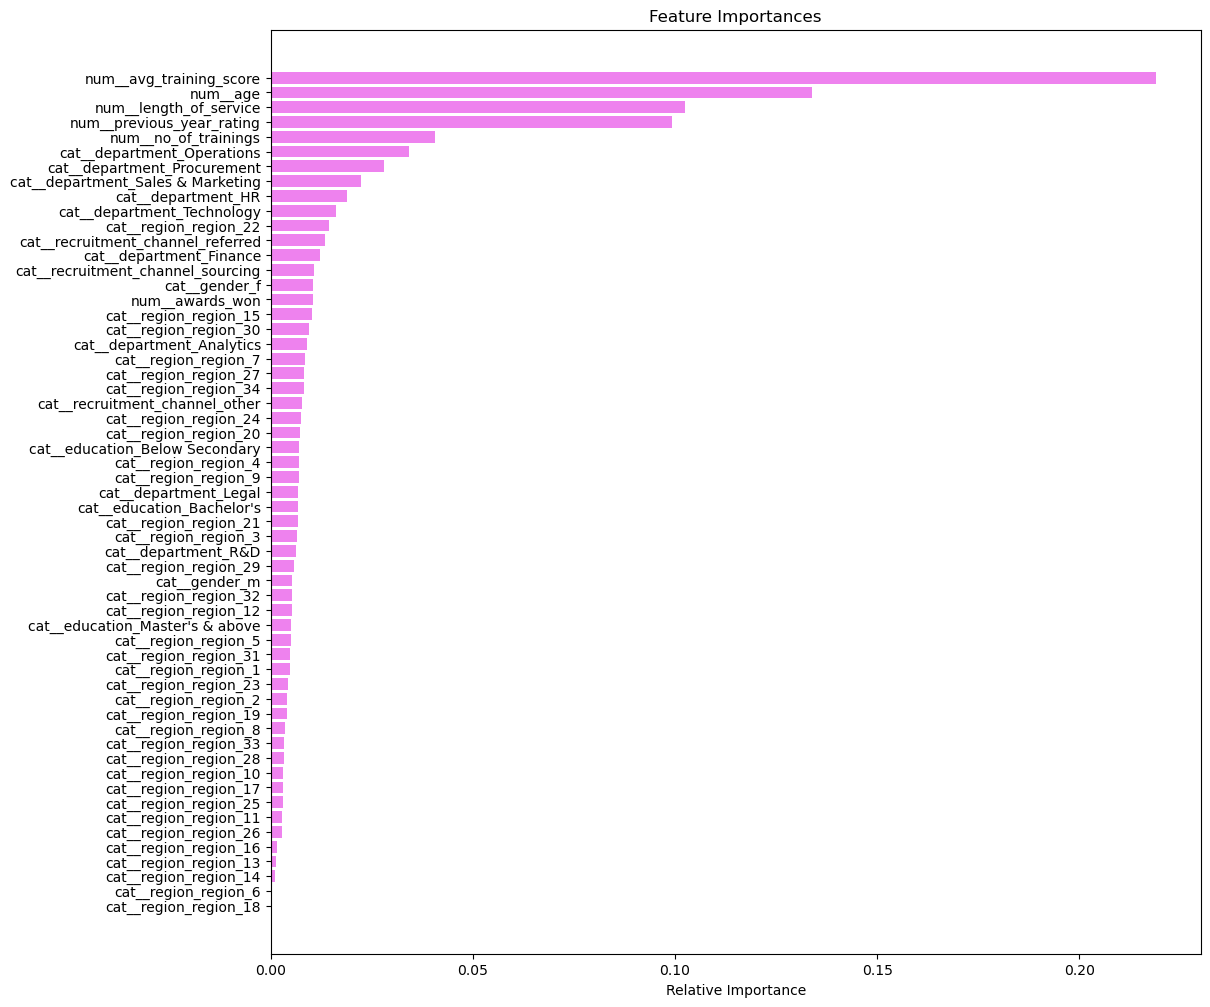

In [419]:
# Extract transformed feature names
preprocessor = pipeline.named_steps['preprocessing']  # Correct key used
transformed_feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
importances = pipeline.named_steps['model'].feature_importances_  # Ensure 'model' key is used

# Sort feature importances
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [transformed_feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Business Insights and Conclusions


### Business Insights and Recommendations on Employee Promotion Analysis

#### **1. Promotion Predictors and Actionable Recommendations**

##### **1.1 Performance Ratings**
- **Observation:** Employees with higher performance ratings are significantly more likely to be promoted.
- **Recommendation:** Introduce performance improvement programs with clear and measurable criteria for promotion. This ensures fairness and provides employees with actionable goals to meet promotion standards.

##### **1.2 Impact of Training**
- **Observation:** Employees with higher average training scores show better promotion rates.
- **Recommendation:** Expand training programs tailored to skills relevant for promotions. Offer incentives, such as completion bonuses or priority consideration, for employees participating in targeted training programs.

##### **1.3 Tenure and Experience**
- **Observation:** Employees with less than 2 years of tenure are less likely to be promoted, potentially impacting retention.
- **Recommendation:** Develop fast-track career development plans for high-performing newcomers to foster early engagement and motivation.

##### **1.4 Educational Attainment**
- **Observation:** Employees with higher education levels are promoted at higher rates.
- **Recommendation:** Offer tuition reimbursement or sponsorship programs for advanced education, enhancing the workforce’s skill set and competitiveness.

---

#### **2. Equity and Diversity in Promotions**

##### **2.1 Underrepresented Groups**
- **Observation:** Disparities in promotion rates across demographic groups (e.g., gender, age, department) might exist.
- **Recommendation:** Implement diversity-focused initiatives such as mentoring programs for underrepresented groups and perform regular equity audits to ensure fair promotion practices.

##### **2.2 Departmental Gaps**
- **Observation:** Certain departments exhibit disproportionately lower promotion rates.
- **Recommendation:** Assess these departments for potential barriers such as limited resources or training opportunities, and provide tailored solutions to address disparities.

---

#### **3. Employee Retention**

##### **3.1 Impact of Promotion Opportunities on Retention**
- **Observation:** Employees without clear promotion opportunities may leave the organization, affecting retention.
- **Recommendation:** Regularly communicate career progression opportunities and establish mentorship programs to enhance employee satisfaction and retention.

##### **3.2 Leadership Training**
- **Observation:** Leadership training correlates with higher promotion rates and retention.
- **Recommendation:** Make leadership training a core element of career development programs, ensuring accessibility to employees at all levels.

---

#### **4. Effectiveness of Current Policies**

##### **4.1 Addressing Class Imbalance**
- **Observation:** SMOTE and other balancing techniques effectively highlight promotion patterns among underrepresented groups.
- **Recommendation:** Use insights from these techniques to identify overlooked employee groups and reassess their readiness for promotions.

##### **4.2 Model Accuracy and Bias Mitigation**
- **Observation:** High validation and recall scores indicate robust prediction performance. However, potential biases in the model must be addressed.
- **Recommendation:** Conduct regular audits of model outputs to ensure fairness, prevent amplification of biases, and align predictions with organizational goals.

---

#### **5. Additional Observations and Recommendations**

##### **5.1 High Feature Importance**
- **Observation:** Key predictors of promotion include previous year ratings, average training scores, and education.
- **Recommendation:** Regularly review and revise promotion criteria to align with organizational goals and ensure fairness and relevance.

##### **5.2 Hyperparameter Tuning Insights**
- **Observation:** Optimized AdaBoost and Gradient Boosting models reveal potential for decision-making improvements.
- **Recommendation:** Invest in refining predictive systems and integrating them into HR workflows to support evidence-based decision-making.

##### **5.3 Training Program Insights**
- **Observation:** Employees who completed specific training programs, such as leadership or technical skill enhancement, had significantly higher promotion rates.
- **Recommendation:** Highlight these training programs as part of employee development initiatives and promote them across departments.

---

#### **6. Summary of Business Actions**

1. **Enhance Training Programs:**
   - Target skills relevant to promotions.
   - Provide incentives for training completion.

2. **Improve Fairness and Equity:**
   - Conduct regular audits to identify disparities in promotion rates.
   - Address barriers in underperforming departments.

3. **Boost Employee Retention:**
   - Create fast-track career paths for high-performing employees.
   - Focus on leadership training as a retention strategy.

4. **Leverage Predictive Models:**
   - Regularly audit predictive models to ensure fairness.
   - Use insights from feature importance analysis to refine HR policies.

5. **Promote Diversity:**
   - Implement initiatives to support underrepresented groups.
   - Ensure equitable access to training and development resources.

---

### Final Note
By leveraging predictive analytics, refining promotion criteria, and addressing equity gaps, organizations can achieve better employee satisfaction, higher retention rates, and a more equitable workplace environment. These strategies ensure long-term success in talent management and organizational growth.

